# <font color='whitegreen'>PROJETO EDA BRASIL</font>

### <font color='whitegreen'>Analise de Dados do conjunto de dados com diversas informações sobre os municipios do Brasil</font>

In [1]:
# Versao da Linguagem Python
from platform import python_version
print('Versao da Linguagem Python utilizada neste notebook: ', python_version())

Versao da Linguagem Python utilizada neste notebook:  3.9.13


### Carregando os pacotes

In [2]:
# Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Pacotes - Adicionais
from scipy.stats import skew

import statsmodels.api as sm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Carregando o dataset

In [4]:
# Carregando o dataset
df = pd.read_csv('2_BRAZIL_CITIES_REV2022.CSV')

In [5]:
df.shape

(5578, 81)

In [6]:
df.columns

Index(['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS',
       'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL',
       'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
       'IBGE_15-59', 'IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$',
       'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade',
       'IDHM_Educacao', 'LONG', 'LAT', 'ALT', 'PAY_TV', 'FIXED_PHONES', 'AREA',
       'REGIAO_TUR', 'CATEGORIA_TUR', 'ESTIMATED_POP', 'RURAL_URBAN',
       'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC',
       'GVA_TOTAL', 'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'GVA_MAIN',
       'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D',
       'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
       'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
       'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS', 'BEDS', 'Pr_Agencies',
       'Pu_Agencies', 'Pr_Bank', 'Pu_Bank', 'Pr_

In [7]:
df.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,...,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,...,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,...,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,...,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,...,2,44974716,371922572,6928,2953,0,0,0,0,4


In [8]:
df.tail()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
5573,Áurea,RS,0,3665,3665,0,1222,548,674,1525,...,2,0,117198141,1435,400,0,0,0,0,1
5574,Ângulo,PR,0,2859,2844,15,929,737,192,2246,...,0,0,0,898,415,0,0,0,0,1
5575,Érico Cardoso,BA,0,10859,10859,0,2659,542,2117,1999,...,0,0,0,655,1020,0,0,0,0,1
5576,Óbidos,PA,0,49333,49324,9,11263,6068,5195,25295,...,3,0,184494811,938,4985,0,0,0,0,1
5577,Óleo,SP,0,2673,2673,0,911,595,316,1763,...,0,0,0,866,172,0,0,0,0,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5578 non-null   object 
 1   STATE                   5578 non-null   object 
 2   CAPITAL                 5578 non-null   int64  
 3   IBGE_RES_POP            5578 non-null   int64  
 4   IBGE_RES_POP_BRAS       5578 non-null   int64  
 5   IBGE_RES_POP_ESTR       5578 non-null   int64  
 6   IBGE_DU                 5578 non-null   int64  
 7   IBGE_DU_URBAN           5578 non-null   int64  
 8   IBGE_DU_RURAL           5578 non-null   int64  
 9   IBGE_POP                5578 non-null   int64  
 10  IBGE_1                  5578 non-null   int64  
 11  IBGE_1-4                5578 non-null   int64  
 12  IBGE_5-9                5578 non-null   int64  
 13  IBGE_10-14              5578 non-null   int64  
 14  IBGE_15-59              5578 non-null   

In [10]:
# Importando uma base auxiliar para trazer a regiao com a maior e menor per capita
regiao = pd.read_excel('Regiao_Brasil.xlsx')
regiao_backup = regiao.copy()

# Renomeando as coluna para fazer o merge
regiao.rename(columns={'UF':'STATE'}, inplace=True)
regiao.rename(columns={'Região':'REGION'}, inplace=True) 
regiao.rename(columns={'Estado':'NAME_STATE'}, inplace=True) 

# Fazendo o merge pela coluna STATE
df = pd.merge(df, regiao, on="STATE", how='inner')

### Analise Exploratoria

In [11]:
# Verificando se ha valor usente
df.isnull().sum().head(29)

CITY                      0
STATE                     0
CAPITAL                   0
IBGE_RES_POP              0
IBGE_RES_POP_BRAS         0
IBGE_RES_POP_ESTR         0
IBGE_DU                   0
IBGE_DU_URBAN             0
IBGE_DU_RURAL             0
IBGE_POP                  0
IBGE_1                    0
IBGE_1-4                  0
IBGE_5-9                  0
IBGE_10-14                0
IBGE_15-59                0
IBGE_60+                  0
IBGE_PLANTED_AREA         0
IBGE_CROP_PRODUCTION_$    0
IDHM Ranking 2010         0
IDHM                      0
IDHM_Renda                0
IDHM_Longevidade          0
IDHM_Educacao             0
LONG                      0
LAT                       0
ALT                       0
PAY_TV                    0
FIXED_PHONES              0
AREA                      0
dtype: int64

In [12]:
df.isnull().sum().tail(29)

COMP_J             0
COMP_K             0
COMP_L             0
COMP_M             0
COMP_N             0
COMP_O             0
COMP_P             0
COMP_Q             0
COMP_R             0
COMP_S             0
COMP_T             0
COMP_U             0
HOTELS             0
BEDS               0
Pr_Agencies        0
Pu_Agencies        0
Pr_Bank            0
Pu_Bank            0
Pr_Assets          0
Pu_Assets          0
Cars               0
Motorcycles        0
Wheeled_tractor    0
UBER               0
MAC                0
WAL-MART           0
POST_OFFICES       0
NAME_STATE         0
REGION             0
dtype: int64

In [13]:
df.isnull().sum().sample(29)

REGION               0
CATEGORIA_TUR        0
GVA_MAIN             0
AREA                 0
GVA_INDUSTRY         0
GDP_CAPITA           0
UBER                 0
COMP_N               0
NAME_STATE           0
MUN_EXPENDIT         0
Pr_Bank              0
PAY_TV               0
Pu_Bank              0
IBGE_RES_POP_BRAS    0
FIXED_PHONES         0
COMP_H               0
IBGE_DU_URBAN        0
Pr_Agencies          0
IBGE_DU_RURAL        0
IDHM Ranking 2010    0
COMP_L               0
COMP_S               0
COMP_Q               0
IBGE_1-4             0
ALT                  0
COMP_D               0
GVA_AGROPEC          0
IBGE_1               0
Cars                 0
dtype: int64

In [14]:
df_backup = df.copy()

### Analise Focada nas Resposta do Projeto

* __Qual Estado com a maior e menor população geral? \
Mostre também onde estão concentrados a população de Estrangeiros por Estado.__

In [15]:
# Filtrando o dataset para analisar a população geral
df_pg = df[['STATE', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS','IBGE_RES_POP_ESTR']]

# Agrupando os estados e sumando a população
df_pg = df_pg.groupby('STATE')['IBGE_RES_POP','IBGE_RES_POP_BRAS','IBGE_RES_POP_ESTR'].sum().reset_index()

# Ordenando os valores
df_pg.sort_values(by='IBGE_RES_POP', ascending=False, inplace=True)

# Ajustando o index
df_pg.reset_index(drop=True, inplace=True)

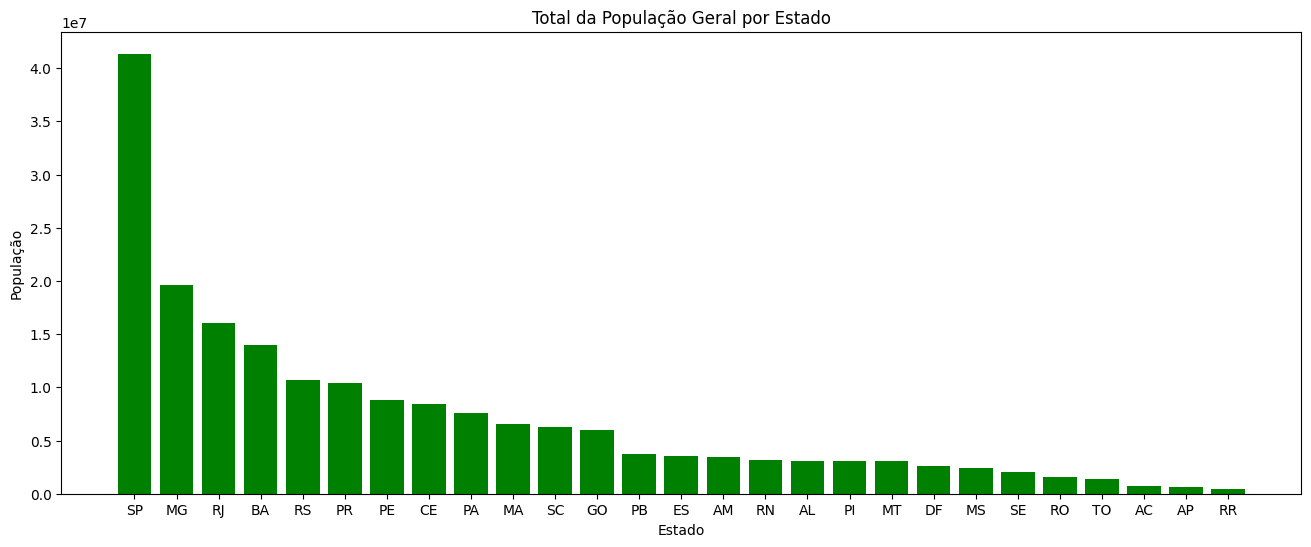

In [16]:
# Plotando o Grafico com a população geral por estado
plt.figure(figsize=(16,6))
plt.bar(df_pg['STATE'], df_pg['IBGE_RES_POP'], color='green')
plt.title('Total da População Geral por Estado')
plt.xlabel('Estado')
plt.ylabel('População')
plt.show()

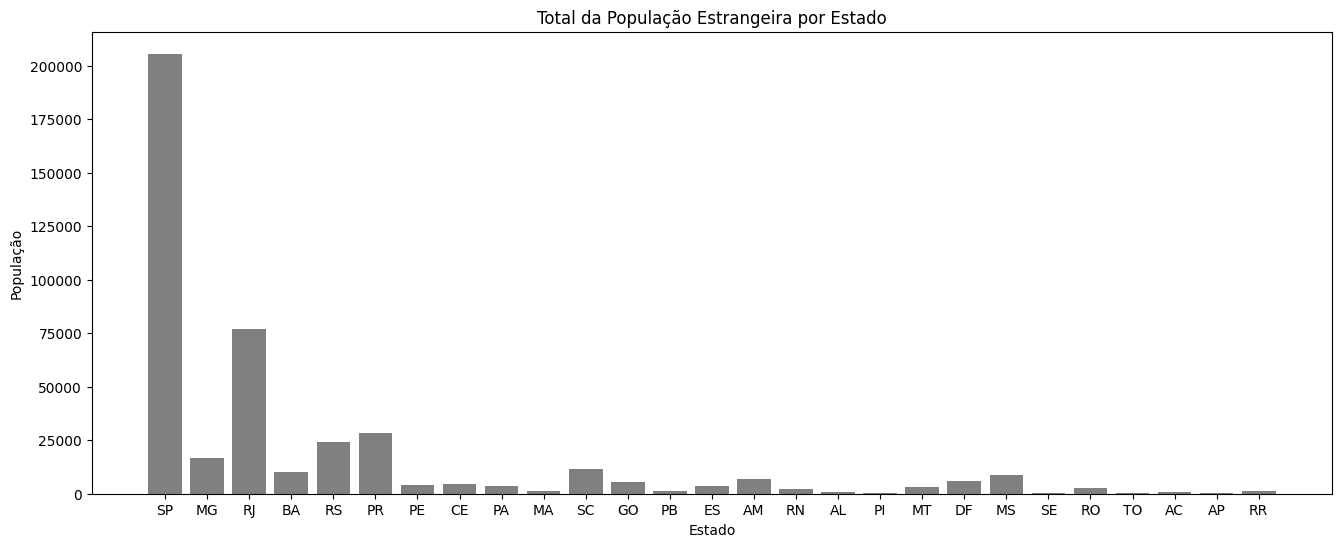

In [17]:
# Plotando o Grafico com a população estrangeura por estado
plt.figure(figsize=(16,6))
plt.bar(df_pg['STATE'], df_pg['IBGE_RES_POP_ESTR'], color='gray')
plt.title('Total da População Estrangeira por Estado')
plt.xlabel('Estado')
plt.ylabel('População')
plt.show()

In [18]:
# Crianda a coluna auxiliar para identificar o percentual de estrangeiros
df_pg['Perc_BRAS'] = round((df_pg['IBGE_RES_POP_BRAS'] / df_pg['IBGE_RES_POP']) * 100, 2)

# Crianda a coluna auxiliar para identificar o percentual de estrangeiros
df_pg['Perc_Estr'] = round((df_pg['IBGE_RES_POP_ESTR'] / df_pg['IBGE_RES_POP']) * 100, 2)

In [19]:
# Criando os objetos para responder a pergunta
# Estado com a maior populacao
df_maior_estado = df_pg[df_pg['IBGE_RES_POP'] ==df_pg['IBGE_RES_POP'].max()]
nome_maior_estado = df_maior_estado['STATE'].iloc[0]
maior_ppg = '{:,.0F}'.format(df_maior_estado['IBGE_RES_POP'].iloc[0]).replace(',', '.')
maior_estr = '{:,.0F}'.format(df_maior_estado['IBGE_RES_POP_ESTR'].iloc[0]).replace(',', '.')
maior_perc_estr = '{:,.1F}'.format(df_maior_estado['Perc_Estr'].iloc[0])

# Estado com a menor populacao
df_menor_estado = df_pg[df_pg['IBGE_RES_POP'] ==df_pg['IBGE_RES_POP'].min()]
nome_menor_estado = df_menor_estado['STATE'].iloc[0]
menor_ppg = '{:,.0F}'.format(df_menor_estado['IBGE_RES_POP'].iloc[0]).replace(',', '.')

In [20]:
print('\033[1m\033[3mQual Estado com a maior e menor população geral?\nMostre também onde estão concentrados a população de Estrangeiros por Estado.\033[0m\n')
print(f'\033[1m\033[3mResposta:\033[0m\nO maior estado é {nome_maior_estado} que tem a "População Geral" dentre os estados com {maior_ppg} habitantes,\n\
com o maior quantidade de estrangeiros no estado de {maior_estr} habitantes, representando um\npercentual de {maior_perc_estr}% que é o maior dentre os outros estados.')
print(f'Sendo que o menor estado apresentado em "População Geral" é {nome_menor_estado} com o total de {menor_ppg} habitantes')

Qual Estado com a maior e menor população geral?
Mostre também onde estão concentrados a população de Estrangeiros por Estado.

Resposta:
O maior estado é SP que tem a "População Geral" dentre os estados com 41.357.343 habitantes,
com o maior quantidade de estrangeiros no estado de 205.671 habitantes, representando um
percentual de 0.5% que é o maior dentre os outros estados.
Sendo que o menor estado apresentado em "População Geral" é RR com o total de 450.479 habitantes


* __Qual Cidade com a maior e menor população geral? \
Mostre também onde estão concentrados a população de Estrangeiros por cidade.__

In [21]:
# Filtrando o dataset para analisar a população geral
df_city = df[['CITY','STATE','IBGE_RES_POP', 'IBGE_RES_POP_BRAS','IBGE_RES_POP_ESTR']]

# Agrupando os estados e sumando a população
df_city = df_city.groupby(['CITY', 'STATE'])['IBGE_RES_POP', 'IBGE_RES_POP_BRAS','IBGE_RES_POP_ESTR'].sum().reset_index()

# Ordenando os valores
df_city.sort_values(by='IBGE_RES_POP', ascending=False, inplace=True)

# Ajustando o index
df_city.reset_index(drop=True, inplace=True)

In [22]:
# Crianda a coluna auxiliar para identificar o percentual de estrangeiros
df_city['Perc_BRAS'] = round((df_city['IBGE_RES_POP_BRAS'] / df_city['IBGE_RES_POP']) * 100, 2)

# Crianda a coluna auxiliar para identificar o percentual de estrangeiros
df_city['Perc_Estr'] = round((df_city['IBGE_RES_POP_ESTR'] / df_city['IBGE_RES_POP']) * 100, 2)

In [23]:
# Separando as 10 cidades com a maior população
top10_city = df_city.nlargest(10,'IBGE_RES_POP')

# Separando as 10 cidades com a maior população estrangeira
top10_city_estr = df_city.nlargest(10,'IBGE_RES_POP_ESTR').reset_index(drop=True)
top10_city_estr

,CITY,STATE,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,Perc_BRAS,Perc_Estr
0,São Paulo,SP,11253503,11133776,119727,98.94,1.06
1,Rio De Janeiro,RJ,6320446,6264915,55531,99.12,0.88
2,Curitiba,PR,1751907,1743036,8871,99.49,0.51
3,Santos,SP,419400,412455,6945,98.34,1.66
4,Belo Horizonte,MG,2375151,2369063,6088,99.74,0.26
5,Porto Alegre,RS,1409351,1403450,5901,99.58,0.42
6,Brasília,DF,2570160,2564370,5790,99.77,0.23
7,Guarulhos,SP,1221979,1216222,5757,99.53,0.47
8,Foz Do Iguaçu,PR,256088,250341,5747,97.76,2.24
9,Campinas,SP,1080113,1075724,4389,99.59,0.41


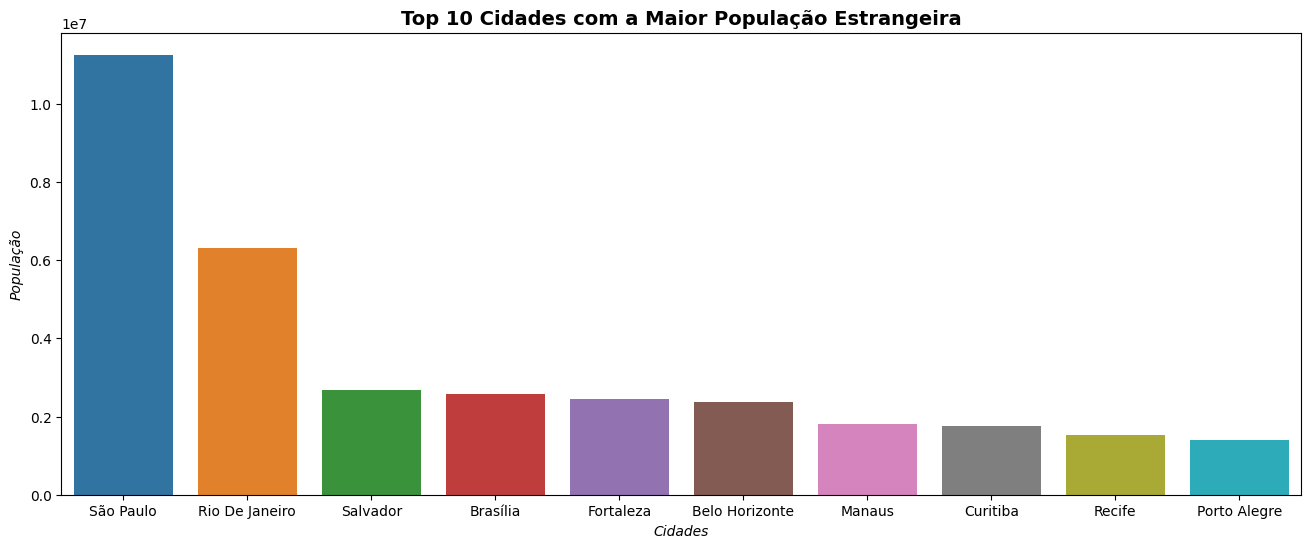

In [24]:
# Plotando um grafico para mostrar a cidades com a maior população num top 10
plt.figure(figsize=(16,6))
sns.barplot(data=top10_city,
            x= 'CITY',
            y= 'IBGE_RES_POP')
plt.title('Top 10 Cidades com a Maior População Estrangeira', fontsize=14, fontweight='bold')
plt.xlabel('Cidades', fontstyle='italic')
plt.ylabel('População', fontstyle='italic')
plt.show()

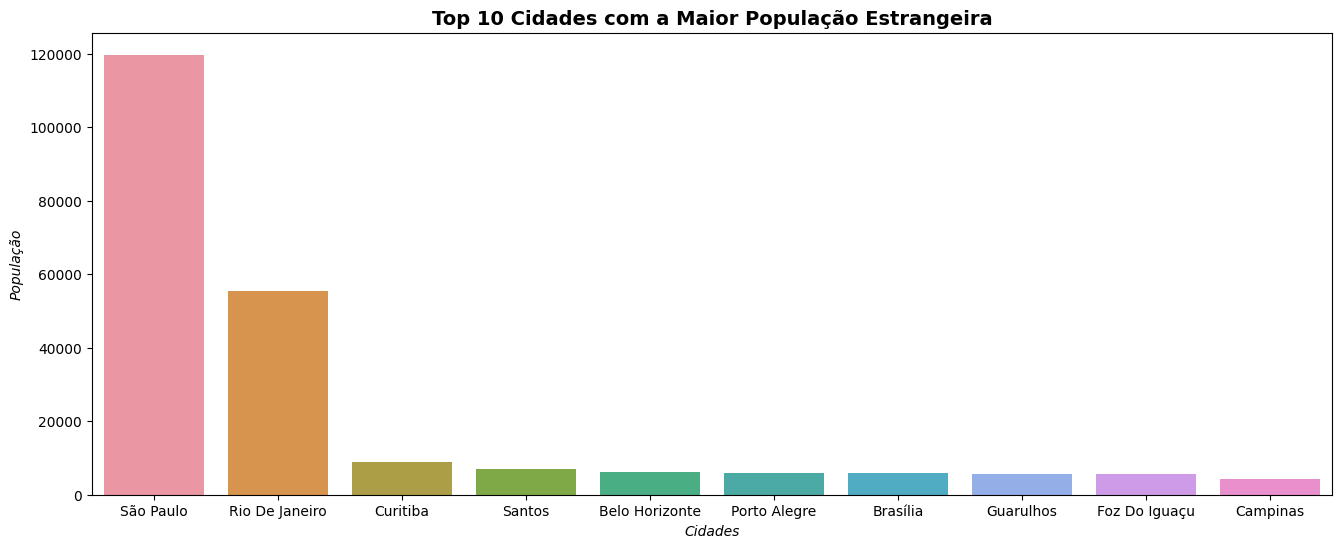

In [25]:
# Plotando um grafico para mostrar a cidades com a maior população estrangeira em top 10
plt.figure(figsize=(16,6))
sns.set_palette('coolwarm')
sns.barplot(data=top10_city_estr,
            x= 'CITY',
            y= 'IBGE_RES_POP_ESTR')
plt.title('Top 10 Cidades com a Maior População Estrangeira', fontsize=14, fontweight='bold')
plt.xlabel('Cidades', fontstyle='italic')
plt.ylabel('População', fontstyle='italic')
plt.show()

In [26]:
# Top 10 das menores cidades
top10_menor_city = df_city.nsmallest(19,'IBGE_RES_POP').tail(10).reset_index(drop=True)
top10_menor_city

,CITY,STATE,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,Perc_BRAS,Perc_Estr
0,Mojuí Dos Campos,PA,0,0,0,NaN,NaN
1,Borá,SP,805,805,0,100.0,0.0
2,Serra Da Saudade,MG,815,815,0,100.0,0.0
3,Anhanguera,GO,1020,1020,0,100.0,0.0
4,Oliveira De Fátima,TO,1037,1037,0,100.0,0.0
5,Araguainha,MT,1096,1096,0,100.0,0.0
6,Nova Castilho,SP,1125,1125,0,100.0,0.0
7,Cedro Do Abaeté,MG,1210,1210,0,100.0,0.0
8,André Da Rocha,RS,1216,1216,0,100.0,0.0
9,Uru,SP,1251,1251,0,100.0,0.0


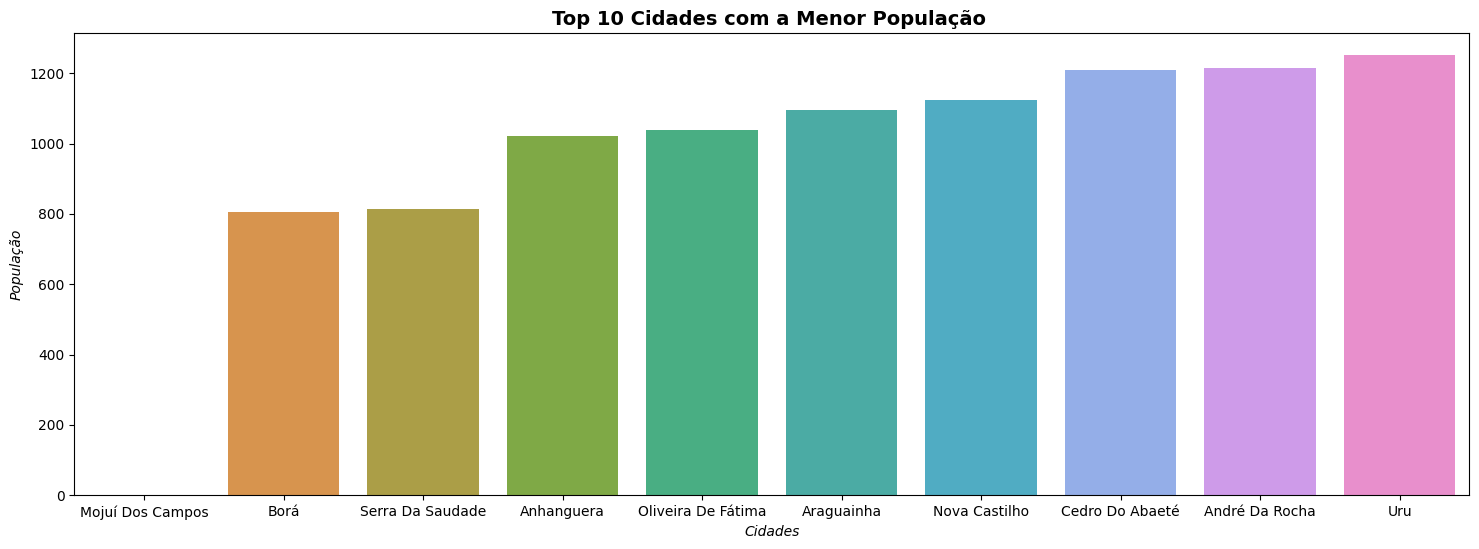

In [27]:
# Plotando um grafico para mostrar a cidades com a menor população em top 10
plt.figure(figsize=(18,6))
sns.barplot(data=top10_menor_city,
            x= 'CITY',
            y= 'IBGE_RES_POP')
plt.title('Top 10 Cidades com a Menor População ', fontsize=14, fontweight='bold')
plt.xlabel('Cidades', fontstyle='italic')
plt.ylabel('População', fontstyle='italic')
plt.show()

In [28]:
# Criando os objetos para responder a pergunta
# Cidade com a maior populacao
df_maior_city = top10_city[top10_city['IBGE_RES_POP'] == top10_city['IBGE_RES_POP'].max()]
nome_maior_city = df_maior_city['CITY'].iloc[0]
maior_ppg_city = '{:,.0F}'.format(top10_city['IBGE_RES_POP'].iloc[0]).replace(',', '.')
maior_estr_city = '{:,.0F}'.format(top10_city['IBGE_RES_POP_ESTR'].iloc[0]).replace(',', '.')
maior_perc_estr_city = '{:,.1F}'.format(top10_city['Perc_Estr'].iloc[0])

# Cidade com a menor populacao
df_menor_cidade = top10_city[top10_menor_city['IBGE_RES_POP'] == top10_menor_city['IBGE_RES_POP'].min()]
nome_menor_cidade = df_menor_cidade['CITY'].iloc[0]
menor_ppg_city = '{:,.0F}'.format(df_menor_cidade['IBGE_RES_POP'].iloc[0]).replace(',', '.')

In [29]:
print('\033[1m\033[3mQual Cidade com a maior e menor população geral? \nMostre também onde estão concentrados a população de Estrangeiros por cidade.\033[0m\n')
print(f'\033[1m\033[3mResposta:\033[0m\nA cidade com a maior "População Geral" é \033[4m\033[3m{nome_maior_city}\033[0m, com \033[3m{maior_ppg_city} habitantes\033[0m, tendo também a maior quantidade\n\
de estrangeiros na cidade, totalizando \033[3m{maior_estr_city} habitantes\033[0m. Isso representa um percentual de \033[3m{maior_perc_estr_city}%\033[0m em relação à \n\
população total da cidade, o maior entre todas as cidades. Por outro lado, a cidade com a menor "População Geral"\n\
é \033[4m\033[3m{nome_menor_cidade}\033[0m, totalizando \033[3m{menor_ppg_city} habitantes.\033[0m')

Qual Cidade com a maior e menor população geral? 
Mostre também onde estão concentrados a população de Estrangeiros por cidade.

Resposta:
A cidade com a maior "População Geral" é São Paulo, com 11.253.503 habitantes, tendo também a maior quantidade
de estrangeiros na cidade, totalizando 119.727 habitantes. Isso representa um percentual de 1.1% em relação à 
população total da cidade, o maior entre todas as cidades. Por outro lado, a cidade com a menor "População Geral"
é São Paulo, totalizando 11.253.503 habitantes.


* __Em que região esta concentrado as maiores e menores rendas per capita?__

In [126]:
# Filtrando o dataset para tratar o valor per capita
df_pcapita = df[['CITY','STATE','GDP_CAPITA', 'REGION']]
df_pcapitamed = df_pcapita.copy()

In [147]:
df_pcapita.groupby('STATE').agg({'GDP_CAPITA':'describe'})

GDP_CAPITA                                                          \
           count          mean           std      min       25%      50%   
STATE                                                                      
AC          22.0  13293.863636   3139.025589   9689.0  10607.00  12590.0   
AL         102.0  11055.656863   7925.888669   5413.0   7332.25   9048.0   
AM          62.0   9601.629032   4838.085803   4534.0   6569.25   8161.5   
AP          16.0  16896.500000   8999.880377  11601.0  12790.75  14201.5   
BA         418.0  11117.342105  15960.817774      0.0   6801.75   8260.0   
CE         184.0   9469.168478   6223.349988   4586.0   6501.00   7568.5   
DF           1.0  79100.000000           NaN  79100.0  79100.00  79100.0   
ES          78.0  21217.525641  19149.583527   9047.0  14720.50  17076.5   
GO         246.0  26278.804878  20758.116685   7501.0  14623.50  19038.5   
MA         217.0   8763.281106   8172.452081   4283.0   5790.00   6828.0   
MG         853.0  17988.933177  15970.014251   5447.0   9834.00  13661.0   
MS          79.0  37003.822785  35318.828965  11837.0  20900.50  28811.0   
MT         141.0  36405.056738  28279.326944  10061.0  18911.00  27594.0   
PA         144.0  13469.500000  10245.965526   5338.0   7790.00  10254.5   
PB         224.0   9444.875000   4225.091274      0.0   7518.00   8536.0   
PE         186.0  11070.666667  10500.832726      0.0   7188.75   8414.0   
PI         224.0   8153.709821   3911.926677   5104.0   6549.50   7156.5   
PR         400.0  29169.957500  14910.639946  10679.0  20548.75  25466.5   
RJ          93.0  30850.322581  22097.921169  12874.0  18428.00  23220.0   
RN         167.0  12371.221557  12321.254535   6204.0   7610.00   8868.0   
RO          52.0  18355.269231   4903.897214  12101.0  15080.25  16463.0   
RR          15.0  15778.600000   3666.610537  10729.0  13248.50  15496.0   
RS         499.0  33590.038076  21139.775177      0.0  22240.00  28600.0   
SC         295.0  30630.298305  14616.833125   8341.0  22359.00  27651.0   
SE          75.0  12973.333333   7196.725791   7724.0   9520.50  10696.0   
SP         646.0  32174.187307  29942.896909   7310.0  17957.75  24514.5   
TO         139.0  16473.654676   8786.596122   7609.0  11086.50  13501.0   

                           
            75%       max  
STATE                      
AC     16111.25   21544.0  
AL     11790.50   71760.0  
AM     11020.50   33564.0  
AP     16575.25   49132.0  
BA     10654.00  296459.0  
CE     10209.25   59098.0  
DF     79100.00   79100.0  
ES     20969.50  169012.0  
GO     30615.50  148316.0  
MA      8366.00   89607.0  
MG     20222.00  183218.0  
MS     39928.50  306139.0  
MT     42370.00  202309.0  
PA     15678.00   69540.0  
PB      9791.25   44509.0  
PE     11645.00  115459.0  
PI      8161.00   41554.0  
PR     33887.50  148440.0  
RJ     33970.00  137592.0  
RN     12270.50  125315.0  
RO     21203.25   36938.0  
RR     17269.50   24853.0  
RS     39734.00  289932.0  
SC     35270.50  180825.0  
SE     13032.50   50537.0  
SP     35361.50  314638.0  
TO     18751.00   69814.0

In [31]:
# Agrupando os valores por regiao e calculando a media
df_pcapita = df_pcapita.groupby('REGION')['GDP_CAPITA'].mean().reset_index()

# Ordenando os valores
df_pcapita.sort_values(by='GDP_CAPITA', ascending=False, inplace=True)
df_pcapita.reset_index(drop=True, inplace=True)

# Ajustando a Coluna GDP_CAPITA para o valor mensal
df_pcapita['GDP_CAPITA'] = df_pcapita['GDP_CAPITA'] / 12
df_pcapita

,REGION,GDP_CAPITA
0,Sul,2614.834590
1,Centro-Oeste,2605.299964
2,Sudeste,2028.599401
3,Norte,1218.279444
4,Nordeste,856.005658


In [135]:
# Ajustando a Coluna GDP_CAPITA para o valor mensal
df_pcapitamed['GDP_CAPITA'] = df_pcapitamed['GDP_CAPITA'] / 12

In [136]:
df_pcapita_mediana = df_pcapitamed.groupby('REGION').agg({'GDP_CAPITA':'describe',}).reset_index()
df_pcapita_mediana

REGION GDP_CAPITA                                                     \
                     count         mean          std         min          25%   
0  Centro-Oeste      467.0  2605.299964  2216.123022  625.083333  1378.416667   
1      Nordeste     1797.0   856.005658   867.099302    0.000000   573.916667   
2         Norte      450.0  1218.279444   714.716813  377.833333   779.229167   
3       Sudeste     1670.0  2028.599401  1985.553290  453.916667  1028.333333   
4           Sul     1194.0  2614.834590  1484.588746    0.000000  1803.104167   

                                           
           50%          75%           max  
0  1963.750000  2899.083333  25511.583333  
1   675.250000   860.583333  24704.916667  
2  1058.583333  1411.250000   5817.833333  
3  1526.416667  2304.479167  26219.833333  
4  2278.750000  3061.062500  24161.000000

In [134]:
df_pcapitamed[df_pcapitamed['GDP_CAPITA']!=0]

,CITY,STATE,GDP_CAPITA,REGION
0,Abadia De Goiás,GO,20665.0,Centro-Oeste
1,Abadiânia,GO,15628.0,Centro-Oeste
2,Acreúna,GO,28049.0,Centro-Oeste
3,Adelândia,GO,12481.0,Centro-Oeste
4,Alexânia,GO,52952.0,Centro-Oeste
...,...,...,...,...
5573,Valença,RJ,27255.0,Sudeste
5574,Varre-Sai,RJ,14923.0,Sudeste
5575,Vassouras,RJ,27053.0,Sudeste
5576,Volta Redonda,RJ,39679.0,Sudeste


In [33]:
# Criando os objetos para responder a pergunta
# Região com a maior per capita
df_maior_pcapita = df_pcapita[df_pcapita['GDP_CAPITA'] == df_pcapita['GDP_CAPITA'].max()]
nome_maior_pcapita = df_maior_pcapita['REGION'].iloc[0]
maior_renda_pcapita = '{:,.0F}'.format(df_maior_pcapita['GDP_CAPITA'].iloc[0]).replace(',', '.')

# Região com a menor per capita
df_menor_pcapita = df_pcapita[df_pcapita['GDP_CAPITA'] == df_pcapita['GDP_CAPITA'].min()]
nome_menor_pcapita = df_menor_pcapita['REGION'].iloc[0]
menor_renda_pcapita = '{:,.0F}'.format(df_menor_pcapita['GDP_CAPITA'].iloc[0]).replace(',', '.')

Em que região esta concentrado as maiores e menores rendas per capita?

Resposta:
A maior concentração de renda per capita é encontrada na região "Sul", onde o valor médio é de R$ 2.615.
Já a menor renda per capita está concentrada na região "Nordeste", com um valor médio de R$ 856.


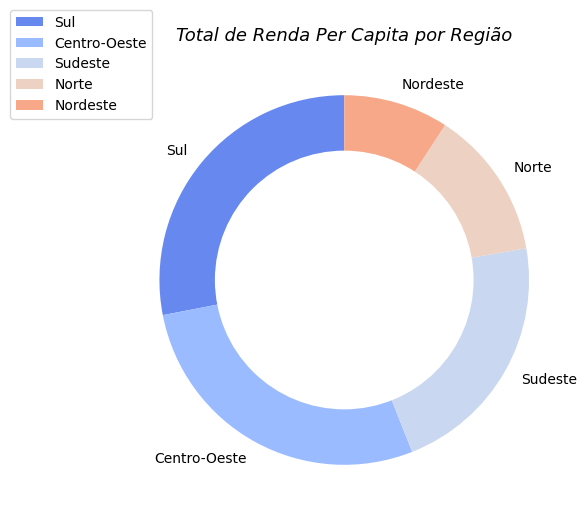

In [34]:
# Imprimindo a resposta
print('\033[1m\033[3mEm que região esta concentrado as maiores e menores rendas per capita?\033[0m\n')
print(f'\033[1m\033[3mResposta:\033[0m\nA maior concentração de renda per capita é encontrada na região "{nome_maior_pcapita}", onde o valor médio é de \033[3mR$ {maior_renda_pcapita}\033[0m.\
\nJá a menor renda per capita está concentrada na região "{nome_menor_pcapita}", com um valor médio de \033[3mR$ {menor_renda_pcapita}\033[0m.')

# Plotando o grafico de pizza
plt.figure(figsize=(16,6))
plt.pie(df_pcapita['GDP_CAPITA'],
        labels=df_pcapita['REGION'],
        autopct='',
        startangle=90)
        
centro_circulo = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

plt.title('Total de Renda Per Capita por Região', fontsize=13, fontstyle='italic')
plt.legend(df_pcapita['REGION'], bbox_to_anchor=(0.1, 1.1))
plt.show()

* __Quais Estados e Cidades tiveram maior e menor contribuição de Impostos?__

In [35]:
# Filtrando o dataset para analisar as cidades e estados pela contribuição imposto
df_imposto = df[['CITY', 'STATE', 'TAXES']]

# Agrupando o Estado para buscar o valor total
df_imposto_estado = df_imposto.groupby('STATE')['TAXES'].sum().reset_index()

# Ordenando os valores
df_imposto.sort_values(by='TAXES', ascending=False, inplace=True)

df_imposto_estado.sort_values(by='TAXES', ascending=False, inplace=True)

# Ajustando o index
df_imposto.reset_index(drop=True, inplace=True)

df_imposto_estado.reset_index(drop=True, inplace=True)

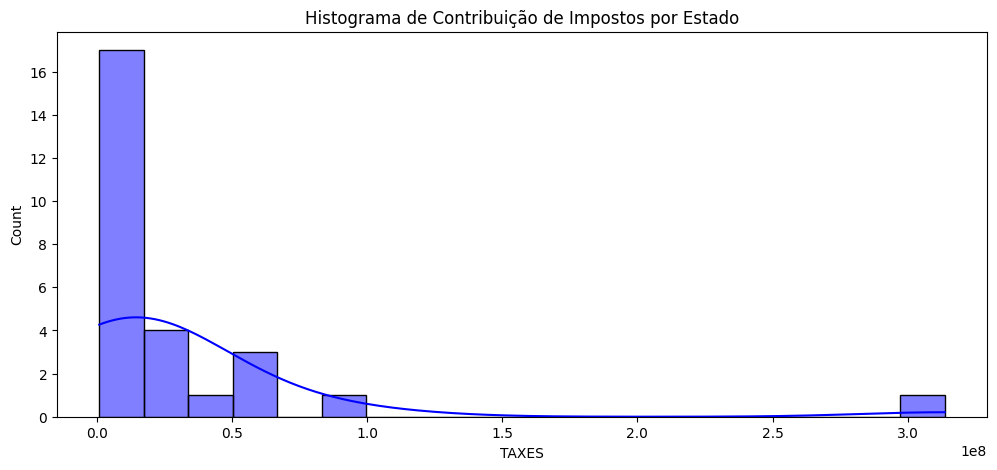

In [36]:
# Distribuição das populações
plt.figure(figsize=(12, 5))
sns.histplot(df_imposto_estado['TAXES'], kde=True, color='blue', label='STATE')
plt.title('Histograma de Contribuição de Impostos por Estado')
plt.show()

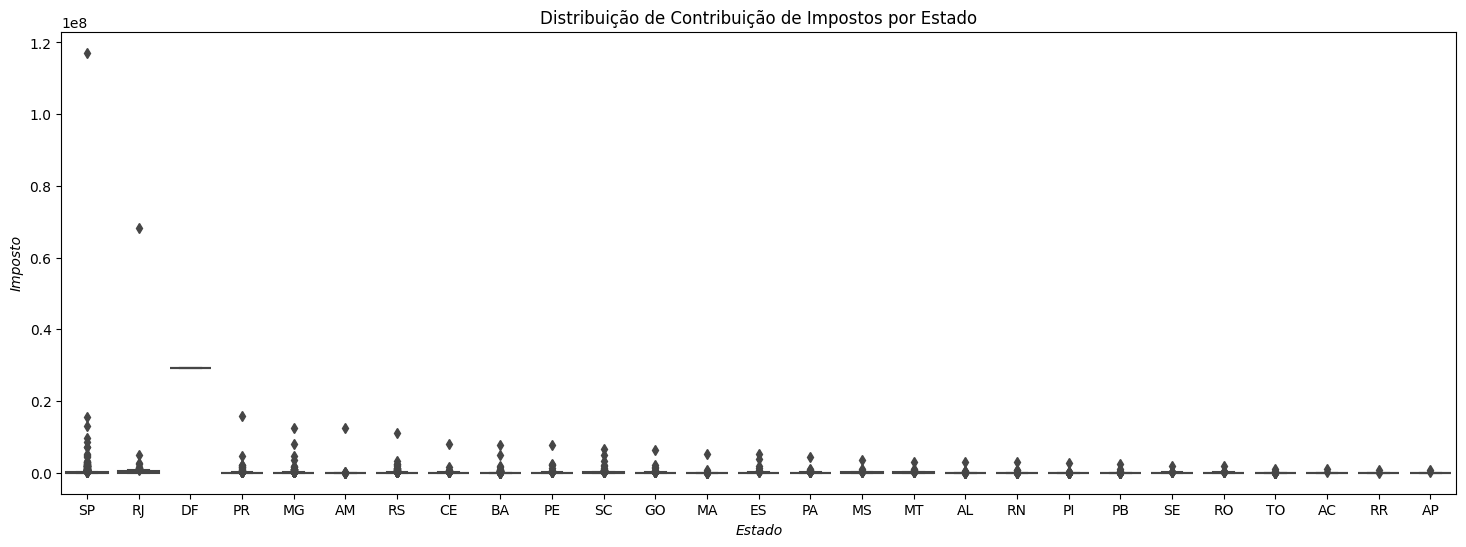

In [37]:
# Plotando um grafico de Boxplot
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_imposto,
            x='STATE', 
            y='TAXES' )
plt.title('Distribuição de Contribuição de Impostos por Estado')
plt.xlabel('Estado', fontstyle='italic')
plt.ylabel('Imposto', fontstyle='italic')
plt.show()

In [38]:
# Criando os objetos para responder a pergunta
# Estado com a maior Contribuicao de imposto
df_maior_imposto_estado = df_imposto_estado[df_imposto_estado['TAXES'] == df_imposto_estado['TAXES'].max()]
nome_maior_imposto_estado = df_maior_imposto_estado['STATE'].iloc[0]
maior_renda_imposto_estado = '{:,.0F}'.format(df_maior_imposto_estado['TAXES'].iloc[0]).replace(',', '.')

# Estado com a menor Contribuicao de imposto
df_menor_imposto_estado = df_imposto_estado[df_imposto_estado['TAXES'] == df_imposto_estado['TAXES'].min()]
nome_menor_imposto_estado = df_menor_imposto_estado['STATE'].iloc[0]
menor_renda_imposto_estado = '{:,.0F}'.format(df_menor_imposto_estado['TAXES'].iloc[0]).replace(',', '.')


# Cidade com a maior Contribuicao de imposto
df_maior_imposto_cidade = df_imposto[df_imposto['TAXES'] == df_imposto['TAXES'].max()]
nome_maior_imposto_cidade = df_maior_imposto_cidade['CITY'].iloc[0]
maior_renda_imposto_cidade = '{:,.0F}'.format(df_maior_imposto_cidade['TAXES'].iloc[0]).replace(',', '.')

# Cidade com a menor Contribuicao de imposto
df_menor_imposto_cidade = df_imposto[df_imposto['TAXES'] == df_imposto['TAXES'].min()]
nome_menor_imposto_cidade = df_menor_imposto_cidade['CITY'].iloc[0]
menor_renda_imposto_cidade = '{:,.0F}'.format(df_menor_imposto_cidade['TAXES'].iloc[0]).replace(',', '.')

In [138]:
df_imposto

,CITY,STATE,TAXES
0,São Paulo,SP,117125387
1,Rio De Janeiro,RJ,68106116
2,Brasília,DF,29145585
3,Curitiba,PR,15912488
4,Osasco,SP,15626341
...,...,...,...
5573,Santa Teresinha,BA,0
5574,Jeriquara,SP,-158
5575,Ribeirão Corrente,SP,-235
5576,Tejupá,SP,-618


In [39]:
print('\033[1m\033[3mQuais Estados e Cidades tiveram maior e menor contribuição de Impostos?\033[0m\n')
print(f'\033[1m\033[3mResposta:\033[0m\nA maior contribuição de imposto é encontrada no estado de "{nome_maior_imposto_estado}", com um valor de \033[3mR$ {maior_renda_imposto_estado}.\033[0m\
\nPor outro lado, a menor contribuição de imposto está no estado de "{nome_menor_imposto_estado}", totalizando \033[3mR$ {menor_renda_imposto_estado}\033[0m. \nEm relação às cidades, a maior \
contribuição de imposto é da cidade de "{nome_maior_imposto_cidade}", que arrecadou \033[3mR$ {maior_renda_imposto_cidade}\033[0m.\nJá a menor contribuição de imposto foi registrada \
na cidade de "{nome_menor_imposto_cidade}", com um valor de \033[3mR$ {menor_renda_imposto_cidade}\033[0m.')

Quais Estados e Cidades tiveram maior e menor contribuição de Impostos?

Resposta:
A maior contribuição de imposto é encontrada no estado de "SP", com um valor de R$ 313.740.977.
Por outro lado, a menor contribuição de imposto está no estado de "RR", totalizando R$ 835.732. 
Em relação às cidades, a maior contribuição de imposto é da cidade de "São Paulo", que arrecadou R$ 117.125.387.
Já a menor contribuição de imposto foi registrada na cidade de "Varre-Sai", com um valor de R$ -14.159.


* __Qual Estado possui maior variação entre a população real e a população estimada?__

In [40]:
# Filtrando o dataset para analisar a população real
df_ppl_real = df[['STATE', 'IBGE_RES_POP', 'ESTIMATED_POP']]

# Calcular a variação entre a população real e estimada
df_ppl_real['VARIATION'] = abs(df_ppl_real['IBGE_RES_POP'] - df_ppl_real['ESTIMATED_POP'])

# Agrupar por estado e somar a variação
df_estado_var = df_ppl_real.groupby('STATE')['VARIATION'].sum().sort_values(ascending=False).reset_index()

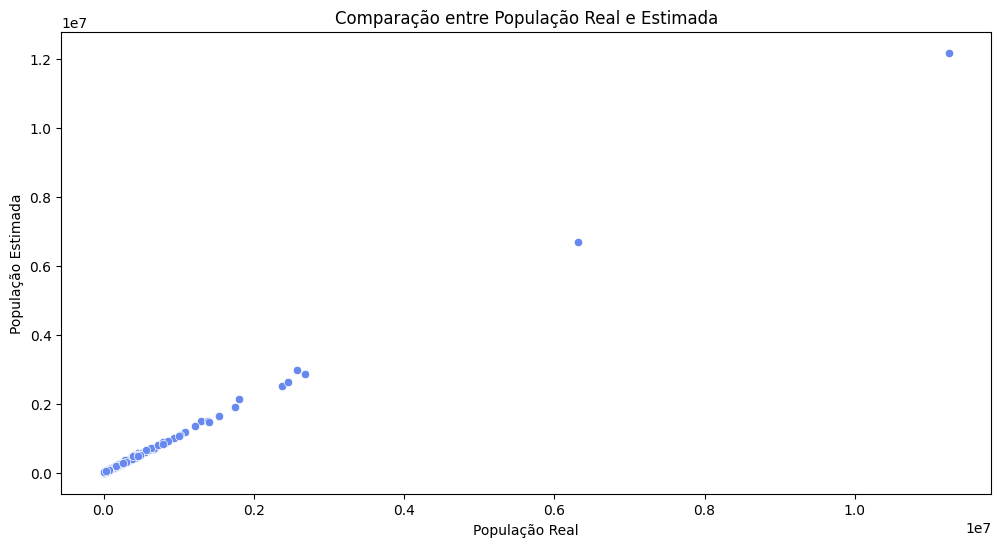

In [41]:
# Plotando um de disperção para comparação entre população real e estimada
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_ppl_real,
                x='IBGE_RES_POP', 
                y='ESTIMATED_POP' )
plt.title('Comparação entre População Real e Estimada')
plt.xlabel('População Real')
plt.ylabel('População Estimada')
plt.show()

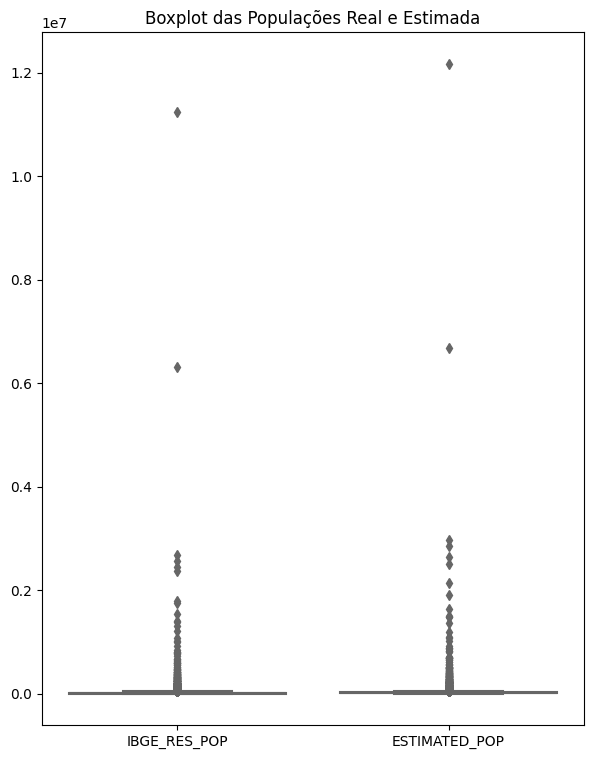

In [42]:
# Boxplot para análise de outliers
plt.figure(figsize=(7,9))
sns.boxplot(data=df_ppl_real[['IBGE_RES_POP', 'ESTIMATED_POP']])
plt.title('Boxplot das Populações Real e Estimada')
plt.show()

In [139]:
df_ppl_real

,STATE,IBGE_RES_POP,ESTIMATED_POP,VARIATION
0,GO,6876,8583,1707
1,GO,15757,19614,3857
2,GO,20279,22182,1903
3,GO,2477,2517,40
4,GO,23814,27288,3474
...,...,...,...,...
5573,RJ,71843,76163,4320
5574,RJ,9475,10890,1415
5575,RJ,34410,36702,2292
5576,RJ,257803,271998,14195


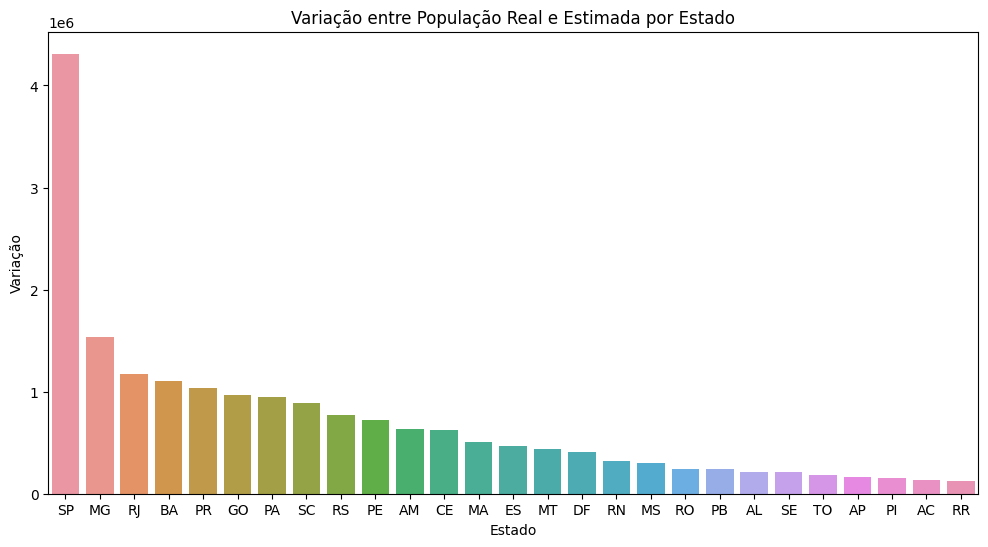

In [43]:
# Plotando um grafico para analisar a variação por estado
plt.figure(figsize=(12,6))
sns.barplot(data=df_estado_var,
            x='STATE', 
            y='VARIATION' )
plt.title('Variação entre População Real e Estimada por Estado')
plt.xlabel('Estado')
plt.ylabel('Variação')
plt.show()

In [44]:
# Criando os objetos para responder a pergunta
# Estado com a maior Contribuicao de imposto
df_maior_maior_var = df_estado_var[df_estado_var['VARIATION'] == df_estado_var['VARIATION'].max()]
nome_estado_maior_var = df_maior_maior_var['STATE'].iloc[0]
estado_maior_var = '{:,.0F}'.format(df_maior_maior_var['VARIATION'].iloc[0]).replace(',', '.')

In [140]:
print('\033[1m\033[3mQual Estado possui maior variação entre a população real e a população estimada?\033[0m\n')
print(f'\033[1m\033[3mResposta:\033[0m\n\
O estado com maior variação entre a população real e a população estimada é "{nome_estado_maior_var}" com uma variação de {estado_maior_var}.')

Qual Estado possui maior variação entre a população real e a população estimada?

Resposta:
O estado com maior variação entre a população real e a população estimada é "SP" com uma variação de 4.310.959.


* __Mostre a região (pode ser Estado, Cidade, Região, etc.) que possui maior Area por quilometro quadrado__ \
__(dica: usar gráficos de dispersão com os parâmetros da Longitude e Latitude)__

In [46]:
# Filtrando o dataset para analisar a area por km²
df_area = df[['REGION', 'STATE', 'CITY', 'AREA', 'LONG', 'LAT', 'ALT']]

# Calcular o total de Area km^2 de cada regiao
regiao_area = df_area.groupby('REGION')['AREA'].sum().reset_index()

In [47]:
# Identificacao de regiao com o maior area km²
area_regiao_max = regiao_area.loc[regiao_area['AREA'].idxmax()]
area_regiao_max

REGION         Norte
AREA      3851281.39
Name: 2, dtype: object

In [48]:
# Criando os objetos para responder a pergunta
# Regiao com a maior Area km²
nome_maior_area = area_regiao_max["REGION"]
area_total_maior_regiao = '{:,.0F}'.format(area_regiao_max["AREA"]).replace(',', '.')

In [49]:
# Limpando do dataset  Longitude, Latitude e Altitude zeradas
df_area_plt = df_area[(df_area['LONG'] != 0) & (df_area['LAT'] != 0) & (df_area['ALT'] != 0)]

Mostre a região que possui maior Area por quilometro quadrado.

Resposta:
A região com a maior area por quilômetro quadrado é: "Norte" com uma area de 3.851.281km².


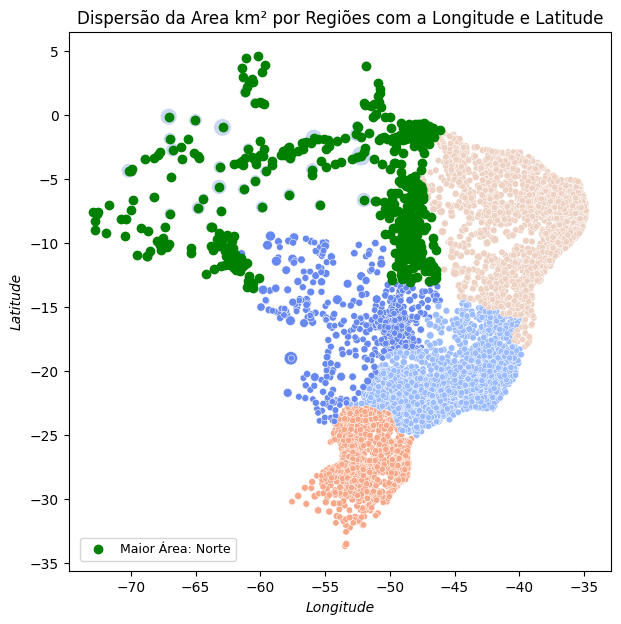

In [50]:
# Imprimindo a resposta
print('\033[1m\033[3mMostre a região que possui maior Area por quilometro quadrado.\033[0m\n')
print(f'\033[1m\033[3mResposta:\033[0m\n\
A região com a maior area por quilômetro quadrado é: "{nome_maior_area}" com uma area de {area_total_maior_regiao}km².')

# Plotando o grafico de dispersao 
plt.figure(figsize=(7,7))
sns.scatterplot(data=df_area_plt,
                x='LONG',
                y='LAT',
                hue='REGION',
                size='AREA',
                sizes=(20,200),
                legend=False)

max_region_data = df_area_plt[df_area_plt['REGION'] == area_regiao_max['REGION']]
plt.scatter(max_region_data['LONG'], max_region_data['LAT'], color='green', label=f'Maior Área: {area_regiao_max["REGION"]}')

plt.title('Dispersão da Area km² por Regiões com a Longitude e Latitude')
plt.xlabel('Longitude', fontstyle='italic')
plt.ylabel('Latitude', fontstyle='italic')
plt.legend(fontsize=9, bbox_to_anchor=(0.32, 0.073))
plt.show()

* __Qual Região possui maior e menor Area Plantada?__

In [51]:
# Filtrando o dataset para analisar a area plantada
df_area_plantada = df[['REGION','IBGE_PLANTED_AREA']]

# Calcular o total de Area km^2 de cada regiao
regiao_area_plantada = df_area_plantada.groupby('REGION')['IBGE_PLANTED_AREA'].sum().sort_values(ascending=False).reset_index()

In [143]:
# Criando os objetos para responder a pergunta
# Região com a maior Area Plantada
df_maior_area_plantada = regiao_area_plantada[regiao_area_plantada['IBGE_PLANTED_AREA'] == regiao_area_plantada['IBGE_PLANTED_AREA'].max()]
nome_maior_area_plantada = df_maior_area_plantada['REGION'].iloc[0]


# Região com a menor Area Plantada
df_menor_area_plantada = regiao_area_plantada[regiao_area_plantada['IBGE_PLANTED_AREA'] == regiao_area_plantada['IBGE_PLANTED_AREA'].min()]
nome_menor_area_plantada = df_menor_area_plantada['REGION'].iloc[0]


Qual Região possui maior e menor Area Plantada?

Resposta:
A região com a maior area plantada é: "Centro-Oeste" com uma area de 27,499,935km².
Por outro lado, a região com a menor area plantada é: Norte com uma area de 4,036,239km².


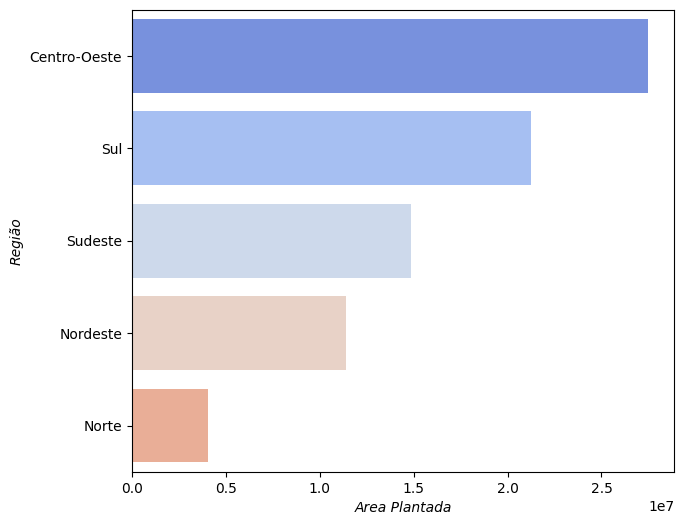

In [144]:
# Imprimindo a resposta
print('\033[1m\033[3mQual Região possui maior e menor Area Plantada?\033[0m\n')
print(f'\033[1m\033[3mResposta:\033[0m\n\
A região com a maior area plantada é: "{nome_maior_area_plantada}" com uma area de {maior_renda_area_plantada}km².\
\nPor outro lado, a região com a menor area plantada é: {nome_menor_area_plantada} com uma area de {menor_renda_area_plantada}km².')

# Plotando o grafico com maior area
plt.figure(figsize=(7,6))
sns.barplot(data=regiao_area_plantada,
            y='REGION', 
            x='IBGE_PLANTED_AREA',
            orient='h' )

plt.xlabel('Area Plantada',fontstyle='italic')
plt.ylabel('Região', fontstyle='italic')
plt.show()

* __Onde estão concentradas as pessoas com maior e menor IDH?__

In [54]:
# Filtrando o dataset para analisar o IDH por regiao
df_idh = df[['STATE','NAME_STATE','REGION', 'CITY', 'IDHM','IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao', 'LONG', 'LAT', 'ALT']]

# Calcular o total de Area km^2 de cada regiao
df_idh_estado = (df_idh
                .groupby(['STATE','NAME_STATE','REGION'])
                .agg({'IDHM': 'median',
                      'IDHM_Renda': 'median',
                      'IDHM_Longevidade': 'median',
                      'IDHM_Educacao': 'median'})
                .sort_values(by=['IDHM'], ascending=False)
                .reset_index())

In [55]:
# Media
media_idh = round(df_idh_estado['IDHM'].mean(), 3)
print('\33[3m\33[1mMédia do IDHM:\33[0m', media_idh)

# Mediana
mediana_idh = round(df_idh_estado['IDHM'].median(), 3)
print('\33[3m\33[1mMediana do IDHM:\33[0m', mediana_idh)

# Desvio Padrao
desvio_padrao_idh = round(df_idh_estado['IDHM'].std(), 3)
print('\33[3m\33[1mDesvio Padrão do IDHM:\33[0m', desvio_padrao_idh)

# Percentil
percentis = np.percentile(df_idh_estado['IDHM'], [25, 50, 75])
percentis = np.round(percentis, 3)
print('\33[3m\33[1m\nPercentis do IDHM:\33[0m')
print('\33[3mPrimeiro quartil (Q1):\33[0m', percentis[0])
print('\33[3mMediana (Q2):\33[0m', percentis[1])
print('\33[3mTerceiro quartil (Q3):\33[0m', percentis[2])

# IQR, LCI e LCS 
iqr = percentis[2] - percentis[0]
fator_iqr = 1.5
lci = round(percentis[0] - fator_iqr * iqr, 3)
lcs = round(percentis[2] + fator_iqr * iqr, 3)
print("\nLimite de Controle Inferior (LCI):", lci)
print("Limite de Controle Superior (LCS):", lcs)


# Coeficiente de Variação
coef_var_idh = round((desvio_padrao_idh / media_idh) * 100 , 3)
print('\33[3m\33[1m\nCoeficiente de Variação do IDHM:\33[0m', coef_var_idh)

# Assimetria
assimetria_idh = round(skew(df_idh_estado['IDHM']), 3)
print('\33[3m\33[1mAssimetria do IDHM:\33[0m', assimetria_idh)

Média do IDHM: 0.645
Mediana do IDHM: 0.639
Desvio Padrão do IDHM: 0.067

Percentis do IDHM:
Primeiro quartil (Q1): 0.588
Mediana (Q2): 0.639
Terceiro quartil (Q3): 0.692

Limite de Controle Inferior (LCI): 0.432
Limite de Controle Superior (LCS): 0.848

Coeficiente de Variação do IDHM: 10.388
Assimetria do IDHM: 0.691


In [56]:
# Funcao para categorizar o IDH seguindoo padrao do PNUD
def categorizar_idh(idm):
    if idm >= 0.800:
        return 'Muito Alto'
    elif idm >= 0.700:
        return 'Alto'
    elif idm >= 0.588:     # Este valor estou usando o Primeiro Quartil para definir a categoria Baixo, pois pelo PNUD nao temos um IDH abixo de 0.550
        return 'Medio'
    else:
        return 'Baixo'

# Aplicar a funcao no dataset
df_idh_estado['Categoria'] = df_idh_estado['IDHM'].apply(categorizar_idh)

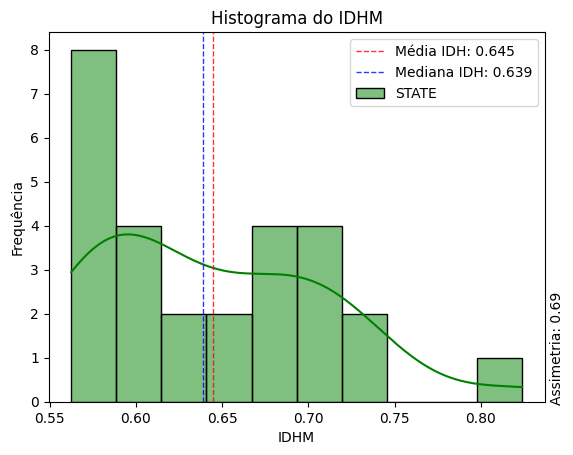

In [57]:
# Histograma do IDH das pessoas
sns.histplot(df_idh_estado['IDHM'], kde=True, color='green', bins=10, label='STATE')

plt.axvline(media_idh, color='red', linestyle='--', linewidth=1, alpha=0.8, label=f'Média IDH: {media_idh:.3f}')
plt.axvline(mediana_idh, color='blue', linestyle='--', linewidth=1, alpha=0.8, label=f'Mediana IDH: {mediana_idh:.3f}')

plt.text(0.84, 0, f'Assimetria: {assimetria_idh:.2f}',rotation=90)
plt.xlabel('IDHM')
plt.ylabel('Frequência')
plt.title('Histograma do IDHM')
plt.legend()
plt.show()

In [58]:
# Definindo a paleta de cores para Cada Categoria
palette = {
    'Muito Alto': '#41B06E',  # Verde
    'Alto': '#318FB5',        # Azul
    'Medio': '#FFD571',       # Amerelo
    'Baixo': '#EA5455'        # Vermelho
}

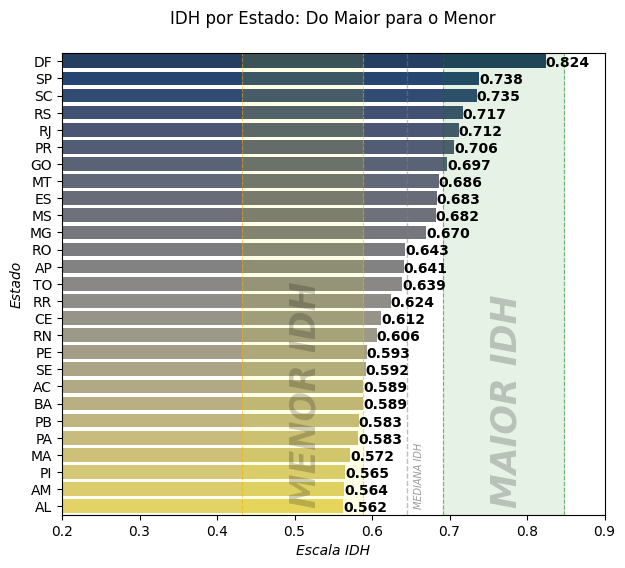

In [59]:
# Plotando o grafico com maiores IDH
plt.figure(figsize=(7,6))

ax = sns.barplot(data=df_idh_estado,
                x='IDHM',
                y='STATE', 
                orient='h',
                palette="cividis",
                alpha=0.9 )

# Adicionando rótulos de dados no centro de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width():.3f}', 
                (p.get_width() + p.get_x(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center_baseline', fontsize=10, color='black', fontweight='bold')

# Adicionando a linha de média do IDH
ax.axvline(media_idh, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax.annotate('MEDIANA IDH', xy=(mediana_idh + 0.015, 26), color='gray', fontsize=7, fontstyle='italic', alpha=0.8, rotation=90)

# Adicionando a linha de Q3 (75%) do IDH
ax.axvline(percentis[2], color='green', linestyle='--', linewidth=0.8, alpha=0.5)
# Adicionando a linha de LCS do IDH
ax.axvline(lcs, color='green', linestyle='--', linewidth=0.8, alpha=0.5)
# Pintando a área entre Q3 e LCS
ax.axvspan(percentis[2], lcs, color='green', alpha=0.1)


# Adicionando a linha de Q1 (25%) do IDH
ax.axvline(percentis[0], color='orange', linestyle='--', linewidth=0.8, alpha=0.5)
# Adicionando a linha de LCI do IDH
ax.axvline(lci, color='orange', linestyle='--', linewidth=0.8, alpha=0.5)
# Pintando a área entre Q1 e LCI
ax.axvspan(lci, percentis[0], color='yellow', alpha=0.1)

ax.text((percentis[2] + 0.06), 25.7, 'MAIOR IDH', color='black', fontsize=25, fontweight='bold', fontstyle='italic', rotation=90, alpha=0.2) 
ax.text((lci + 0.06), 25.7, 'MENOR IDH', color='black', fontsize=25, fontweight='bold', fontstyle='italic', rotation=90, alpha=0.2)

plt.xlim(0.2,0.9)
plt.title('IDH por Estado: Do Maior para o Menor\n')
plt.xlabel('Escala IDH',fontstyle='italic')
plt.ylabel('Estado', fontstyle='italic')

plt.show()

In [60]:
# Limpando do dataset  Longitude, Latitude e Altitude zeradas
df_idh_plt = df_idh[(df_idh['LONG'] != 0) & (df_idh['LAT'] != 0) & (df_idh['ALT'] != 0)]

In [61]:
# Criando os objetos para responder a pergunta
# Região com o maior IDH
df_maior_idh = df_idh_estado[df_idh_estado['IDHM'] >= percentis[2]].head(5)
nome_maior__idh_regiao = ', '.join(df_maior_idh['NAME_STATE'].values.tolist())
maior_idh_regiao = '{:,.3F}'.format(df_maior_idh['IDHM'].iloc[0]).replace(',', '.')

# Região com o menor IDH
df_menor_idh = df_idh_estado[df_idh_estado['IDHM'] <= percentis[0]].tail(5)
nome_menor_idh_regiao = ', '.join(df_menor_idh['NAME_STATE'].values.tolist())
menor_idh_regiao = '{:,.3F}'.format(df_menor_idh['IDHM'].iloc[0]).replace(',', '.')

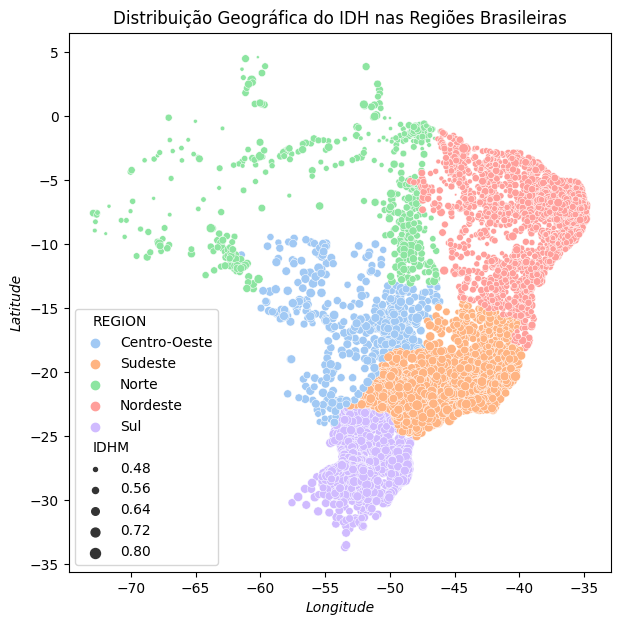

In [62]:
# Plotando o grafico de dispersao 
plt.figure(figsize=(7,7))
sns.scatterplot(data=df_idh_plt,
                x='LONG',
                y='LAT',
                hue='REGION',
                size='IDHM',
                sizes=(0,60),
                legend=True,
                palette='pastel')

plt.title('Distribuição Geográfica do IDH nas Regiões Brasileiras')
plt.xlabel('Longitude', fontstyle='italic')
plt.ylabel('Latitude', fontstyle='italic')
plt.show()

Onde estão concentradas as pessoas com maior e menor IDH?

Resposta:
Os Estado com os maiores indices de IDH são: " Distrito Federal, São Paulo, Santa Catarina, Rio Grande do Sul, Rio de Janeiro ".
Por outro lado, a região com os menores indices de IDH são: " Pará, Maranhão, Piauí, Amazonas, Alagoas ".
A estatística utilizada no processo de resolução foi a mediana, devido à sua capacidade de representar a concentração central dos dados na população.
(A mediana é menos suscetível a mudanças devido a outliers "valores extremos").


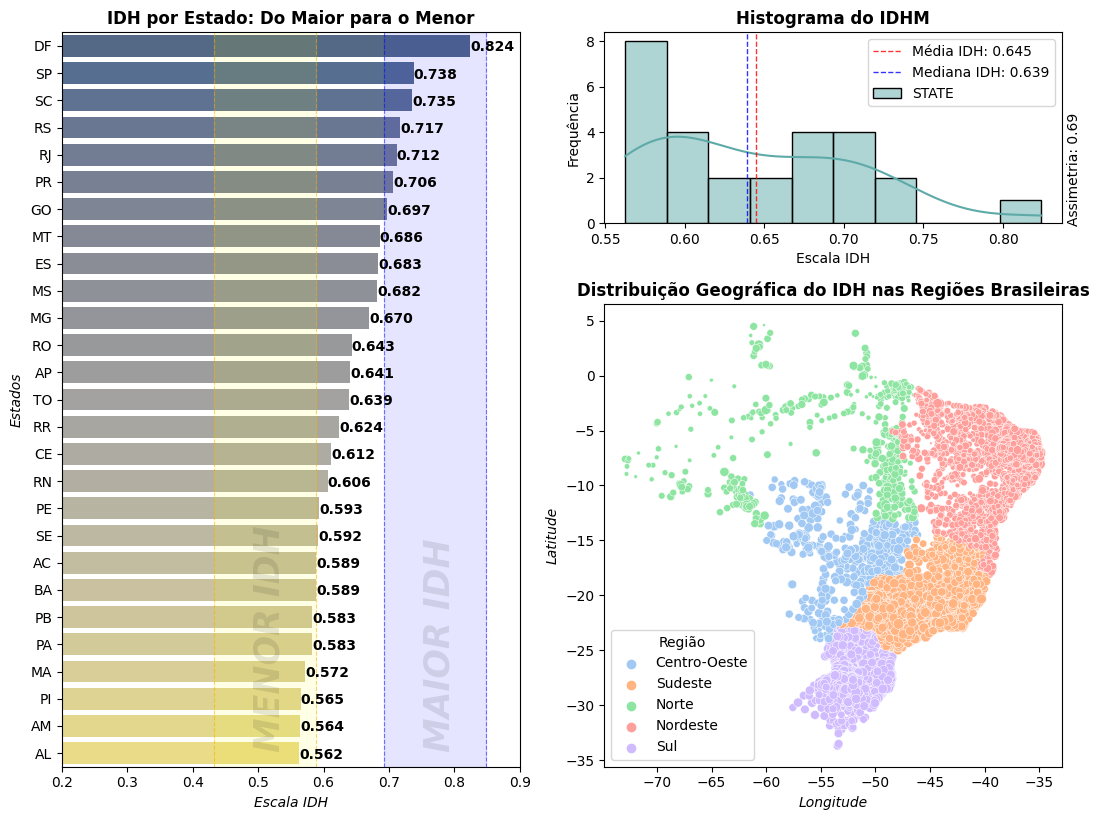

In [63]:
# Imprimindo a resposta
print('\033[1m\033[3mOnde estão concentradas as pessoas com maior e menor IDH?\033[0m\n')
print(f'\033[1m\033[3mResposta:\033[0m\n\
Os Estado com os maiores indices de IDH são: " {nome_maior__idh_regiao} ".\
\nPor outro lado, a região com os menores indices de IDH são: " {nome_menor_idh_regiao} ".\
\nA estatística utilizada no processo de resolução foi a mediana, devido à sua capacidade de representar a concentração central dos dados na população.\n\
(A mediana é menos suscetível a mudanças devido a outliers "valores extremos").')

# Criando uma imagem com três gráficos
fig = plt.figure(figsize=(11, 8.3))

# Plot 1 grafico com maiores IDH 
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=3)
sns.barplot(data=df_idh_estado,
                x='IDHM',
                y='STATE', 
                orient='h',
                palette="cividis",
                alpha=0.7,
                ax=ax1)

# Adicionando rótulos de dados no centro de cada barra
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.3f}', 
                (p.get_width() + p.get_x(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center_baseline', fontsize=10, color='black', fontweight='bold')

# Adicionando a linha de Q3 (75%) do IDH
ax1.axvline(percentis[2], color='blue', linestyle='--', linewidth=0.8, alpha=0.5)
# Adicionando a linha de LCS do IDH
ax1.axvline(lcs, color='blue', linestyle='--', linewidth=0.8, alpha=0.5)
# Pintando a área entre Q3 e LCS
ax1.axvspan(percentis[2], lcs, color='blue', alpha=0.1)


# Adicionando a linha de Q1 (25%) do IDH
ax1.axvline(percentis[0], color='orange', linestyle='--', linewidth=0.8, alpha=0.5)
# Adicionando a linha de LCI do IDH
ax1.axvline(lci, color='orange', linestyle='--', linewidth=0.8, alpha=0.5)
# Pintando a área entre Q1 e LCI
ax1.axvspan(lci, percentis[0], color='yellow', alpha=0.1)

ax1.text((percentis[2] + 0.06), 25.7, 'MAIOR IDH', color='black', fontsize=25, fontweight='bold', fontstyle='italic', rotation=90, alpha=0.1) 
ax1.text((lci + 0.06), 25.7, 'MENOR IDH', color='black', fontsize=25, fontweight='bold', fontstyle='italic', rotation=90, alpha=0.1)

ax1.set_xlim(0.2,0.9)
ax1.set_title('IDH por Estado: Do Maior para o Menor', fontweight='bold')
ax1.set_xlabel('Escala IDH',fontstyle='italic')
ax1.set_ylabel('Estados', fontstyle='italic')


# Plot 2 - grafico de dispersao 
ax2 = plt.subplot2grid((3, 2), (1, 1), rowspan=2)
sns.scatterplot(data=df_idh_plt,
                x='LONG',
                y='LAT',
                hue='REGION',
                size='IDHM',
                sizes=(0,60),
                legend='brief',
                palette='pastel',
                ax=ax2)

handles, labels = ax2.get_legend_handles_labels()
num_regions = df_idh_plt['REGION'].nunique()
region_handles = handles[1:num_regions + 1]  
region_labels = labels[1:num_regions + 1]    
ax2.legend(region_handles, region_labels, title='Região', loc='best')

ax2.set_title('Distribuição Geográfica do IDH nas Regiões Brasileiras', fontweight='bold')
ax2.set_xlabel('Longitude', fontstyle='italic')
ax2.set_ylabel('Latitude', fontstyle='italic')

# Plot 3 - Histograma do IDH das pessoas
ax3 = plt.subplot2grid((3, 2), (0, 1))
sns.histplot(df_idh_estado['IDHM'], 
            kde=True, 
            color='#5EAAA8', 
            bins=10, 
            label='STATE',
            ax=ax3)

ax3.axvline(media_idh, color='red', linestyle='--', linewidth=1, alpha=0.8, label=f'Média IDH: {media_idh:.3f}')
ax3.axvline(mediana_idh, color='blue', linestyle='--', linewidth=1, alpha=0.8, label=f'Mediana IDH: {mediana_idh:.3f}')
ax3.text(0.84, 0, f'Assimetria: {assimetria_idh:.2f}', rotation=90)
ax3.set_xlabel('Escala IDH')
ax3.set_ylabel('Frequência')
ax3.set_title('Histograma do IDHM', fontweight='bold')
ax3.legend()

plt.tight_layout()
plt.show()

* __Existe relação entre o PIB per capita e o IDHM das pessoas? Justificar__

In [64]:
# Filtrando o dataset para analisar o PIB per capita como o IDH
df_pib_idh = df[['STATE','REGION', 'IDHM', 'GDP_CAPITA' ]]

# Limpando o dataset para tirar os valores zerados
df_pib_idh = df_pib_idh[(df_pib_idh['IDHM']!=0) & (df_pib_idh['GDP_CAPITA']!=0)]

In [65]:
# Verificando a correlacao dentre os dados
df_pib_idh.corr()

,IDHM,GDP_CAPITA
IDHM,1.000000,0.500989
GDP_CAPITA,0.500989,1.000000


In [66]:
# Preparacao dos dados para o modelo
X = np.array(df_pib_idh['IDHM'])

# Ajustando o shape de X
X = X.reshape(-1,1)

# Preparacao da variavel alvo
y = df_pib_idh['GDP_CAPITA']

In [148]:
# Grafico de Dispersao entre X e y
sns.regplot(X, y, label='Dados Reais')
plt.xlabel('IDH')
plt.ylabel('PIB per capita')
plt.title('Relacao entre o PIB per capita e IDH')
plt.legend()
plt.show()

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [68]:
# Dividindo dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Exibindo o Shape de treino e teste
print('Dados de treino',X_treino.shape)
print('Dados de teste',X_teste.shape)
print('Dados de treino',y_treino.shape)
print('Dados de teste',y_teste.shape)

Dados de treino (4452, 1)
Dados de teste (1114, 1)
Dados de treino (4452,)
Dados de teste (1114,)


In [70]:
# Criando o modelo de regressao linear
modelo_regressao = LinearRegression()
modelo_regressao.fit(X_treino, y_treino)

LinearRegression()

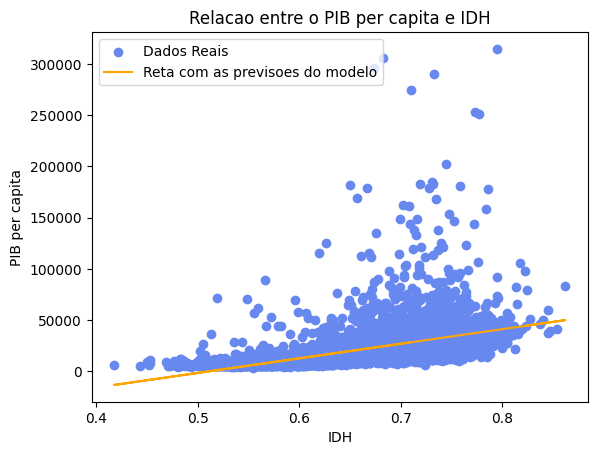

In [71]:
# Visualizacao da reta de regressao linear (previsoes) e os dados reais usado no treinamento
plt.scatter(X, y, label='Dados Reais')
plt.plot(X, modelo_regressao.predict(X), color='orange', label='Reta com as previsoes do modelo')
plt.xlabel('IDH')
plt.ylabel('PIB per capita')
plt.title('Relacao entre o PIB per capita e IDH')
plt.legend()
plt.show()

In [72]:
# Coeficientes da regressão
# Avalia o modelo nos dados de teste
score = modelo_regressao.score(X_teste,y_teste)
score_perc = score * 100
print(f'Coeficiente R^2 (R-squared): {score:.3f}')

# Intercepto - parametro w0
intercept = modelo_regressao.intercept_
intercept_format = '{:.2f}'.format(intercept)
print(f'Coeficiente linear (interceptação): {intercept}')

# Slope - parametro w1
slope = modelo_regressao.coef_[0]
print(f'Coeficiente angular (inclinação): {slope}')


Coeficiente R^2 (R-squared): 0.242
Coeficiente linear (interceptação): -72638.8773882214
Coeficiente angular (inclinação): 142412.82431189303


Existe relação entre o PIB per capita e o IDHM das pessoas? Justificar

Resposta:
Sim, existe uma relação entre o PIB per capita e o IDH das pessoas, onde regiões com maiores valores
de PIB per capita tendem a ter um IDH mais alto. No entanto, não é um fator determinante, pois
apenas 24.2% da variação no IDHM pode ser explicada pelo PIB per capita.


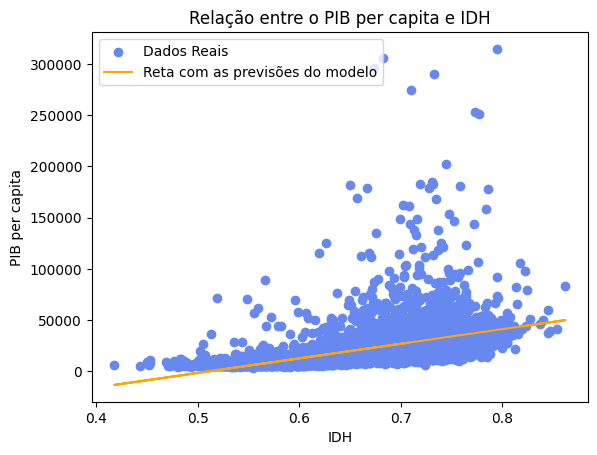

In [73]:
# Imprimindo a resposta
print('\033[1m\033[3mExiste relação entre o PIB per capita e o IDHM das pessoas? Justificar\033[0m\n')
print(f'\033[1m\033[3mResposta:\033[0m\n\
Sim, existe uma relação entre o PIB per capita e o IDH das pessoas, onde regiões com maiores valores\n\
de PIB per capita tendem a ter um IDH mais alto. No entanto, não é um fator determinante, pois\n\
apenas \033[3m{score_perc:.1f}%\033[0m da variação no IDHM pode ser explicada pelo PIB per capita.')

# Visualizacao da reta de regressao linear (previsoes) e os dados reais usado no treinamento
plt.scatter(X, y, label='Dados Reais')
plt.plot(X, modelo_regressao.predict(X), color='orange', label='Reta com as previsões do modelo')
plt.xlabel('IDH')
plt.ylabel('PIB per capita')
plt.title('Relação entre o PIB per capita e IDH')
plt.legend()
plt.show()

* __Existe relação entre o PIB per capita e expectativa de vida (IDHM Longevidade)? Justificar__

In [74]:
# Filtrando o dataset para analisar o PIB per capita como o IDH longevidade
df_pib_idh_long = df[['STATE','REGION', 'IDHM_Longevidade', 'GDP_CAPITA' ]]

# Limpando o dataset para tirar os valores zerados
df_pib_idh_long = df_pib_idh_long[(df_pib_idh_long['IDHM_Longevidade']!=0) & (df_pib_idh_long['GDP_CAPITA']!=0)]

In [75]:
# Verificando a correlacao dentre os dados
df_pib_idh_long.corr()

,IDHM_Longevidade,GDP_CAPITA
IDHM_Longevidade,1.000000,0.440734
GDP_CAPITA,0.440734,1.000000


In [76]:
# Preparacao dos dados para o modelo - Independente
X1 = np.array(df_pib_idh_long['IDHM_Longevidade'])

# Ajustando o shape de X - Independente
X1 = X1.reshape(-1,1)

# Preparacao da variavel alvo - Dependente
y1 = df_pib_idh_long['GDP_CAPITA']

In [77]:
# Assimetria
skew_idh_long = round(skew(df_pib_idh_long['IDHM_Longevidade']), 3)
print('\33[3m\33[1mAssimetria do IDHM Longevidade:\33[0m', skew_idh_long)

Assimetria do IDHM Longevidade: -0.41


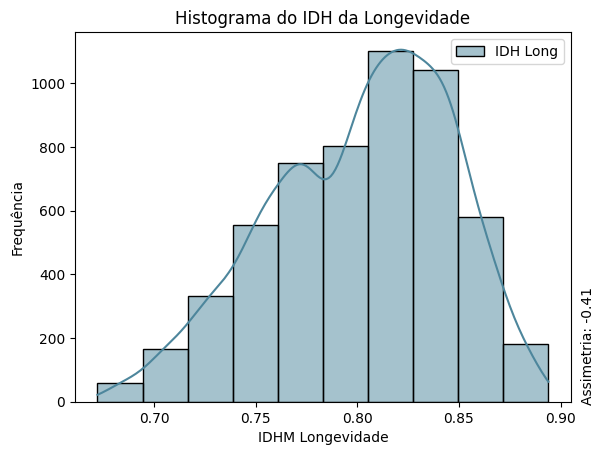

In [78]:
# Histograma do IDH Longevidade
sns.histplot(df_pib_idh_long['IDHM_Longevidade'], kde=True, color='#4D869C', bins=10, label='IDH Long')
plt.text(0.91, 0, f'Assimetria: {skew_idh_long:.2f}',rotation=90)
plt.xlabel('IDHM Longevidade')
plt.ylabel('Frequência')
plt.title('Histograma do IDH da Longevidade')
plt.legend()
plt.show()

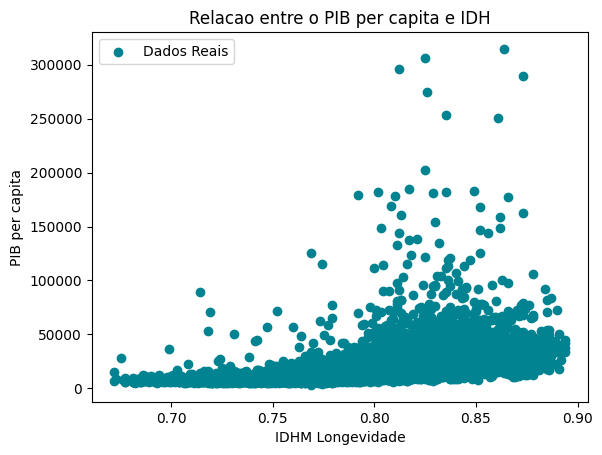

In [79]:
# Grafico de Dispersao 
plt.scatter(X1, y1, label='Dados Reais', color='#028391')
plt.xlabel('IDHM Longevidade')
plt.ylabel('PIB per capita')
plt.title('Relacao entre o PIB per capita e IDH')
plt.legend()
plt.show() 

In [80]:
# Adicao constante da variavel independente
X1 = sm.add_constant(X1)

In [81]:
# Criando o modelo OLS - Statsmodels
modelo_ols = sm.OLS(y1, X1)

In [82]:
# Treinamento do modelo OLS
resultado_ols = modelo_ols.fit()

                            OLS Regression Results                            
Dep. Variable:             GDP_CAPITA   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     1341.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          2.75e-263
Time:                        19:03:03   Log-Likelihood:                -62506.
No. Observations:                5566   AIC:                         1.250e+05
Df Residuals:                    5564   BIC:                         1.250e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.395e+05   4393.442    -31.759      0.0

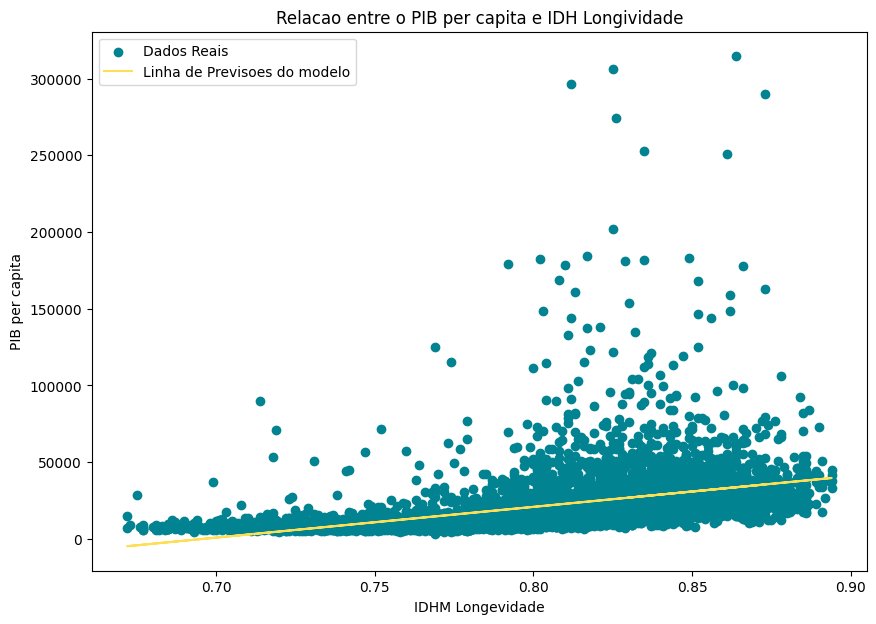

In [83]:
# Imprimindo a tabela de resultado
print(resultado_ols.summary())

# Grafico de Dispersao 
plt.figure(figsize=(10,7))
plt.scatter(df_pib_idh_long['IDHM_Longevidade'], y1, label='Dados Reais', color='#028391')
plt.plot(df_pib_idh_long['IDHM_Longevidade'], resultado_ols.fittedvalues, color='#FDDE55', label='Linha de Previsoes do modelo')
plt.xlabel('IDHM Longevidade')
plt.ylabel('PIB per capita')
plt.title('Relacao entre o PIB per capita e IDH Longividade')
plt.legend()
plt.show() 

* __Existe relação entre o PIB e o número total de empresas? Justificar__

In [84]:
# Filtrando o dataset para analisar o PIB per capita como o IDH
df_pib_empresa = df[['STATE','REGION','COMP_TOT','GDP_CAPITA']]


In [85]:
# Verificando a correlacao dos dados
df_pib_empresa.corr()

,COMP_TOT,GDP_CAPITA
COMP_TOT,1.000000,0.085942
GDP_CAPITA,0.085942,1.000000


In [86]:
df_pib_empresa_estado = df_pib_empresa.groupby(['STATE','REGION'])['COMP_TOT','GDP_CAPITA'].sum().sort_values(by='GDP_CAPITA',ascending=False).reset_index()

In [87]:
# Verificando a correlacao dos dados por Estado
df_pib_empresa_estado.corr()

,COMP_TOT,GDP_CAPITA
COMP_TOT,1.000000,0.859934
GDP_CAPITA,0.859934,1.000000


In [88]:
# Preparacao dos dados para o modelo - Independente
X2 = np.array(df_pib_empresa_estado['COMP_TOT'])

# Ajustando o shape de X - Independente
X2 = X2.reshape(-1,1)

# Preparacao da variavel alvo - Dependente
y2 = df_pib_empresa_estado['GDP_CAPITA']

In [89]:
# Assimetria
skew_pib_empresa = round(skew(df_pib_empresa_estado['COMP_TOT']), 2)
print('\33[3m\33[1mAssimetria do total de empresas:\33[0m', skew_pib_empresa)

Assimetria do total de empresas: 3.37


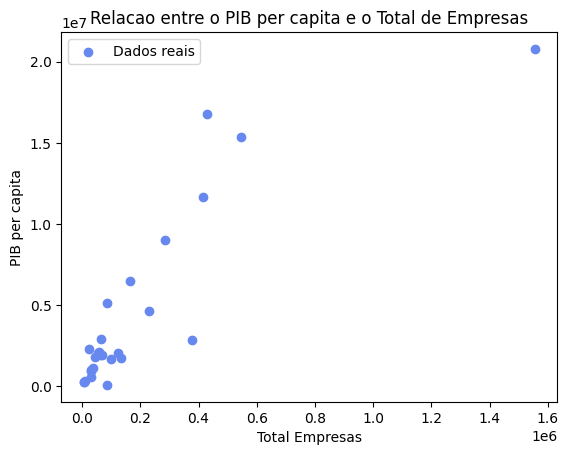

In [90]:
# Grafico de dispersao
plt.scatter(y=y2, x=df_pib_empresa_estado['COMP_TOT'], label='Dados reais')
plt.xlabel('Total Empresas')
plt.ylabel('PIB per capita')
plt.title('Relacao entre o PIB per capita e o Total de Empresas')
plt.legend()
plt.show()

In [91]:
# Adicao constante da variavel independente
X2 = sm.add_constant(X2) 

In [92]:
# Criando o modelo OLS - statsmodels
modelo_ols_empresas = sm.OLS(y2, X2)

In [93]:
# Treinando o modelo OLS
resultado_empresas = modelo_ols_empresas.fit()

                            OLS Regression Results                            
Dep. Variable:             GDP_CAPITA   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     70.96
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           9.05e-09
Time:                        19:03:06   Log-Likelihood:                -438.88
No. Observations:                  27   AIC:                             881.8
Df Residuals:                      25   BIC:                             884.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.493e+06   6.51e+05      2.293      0.0

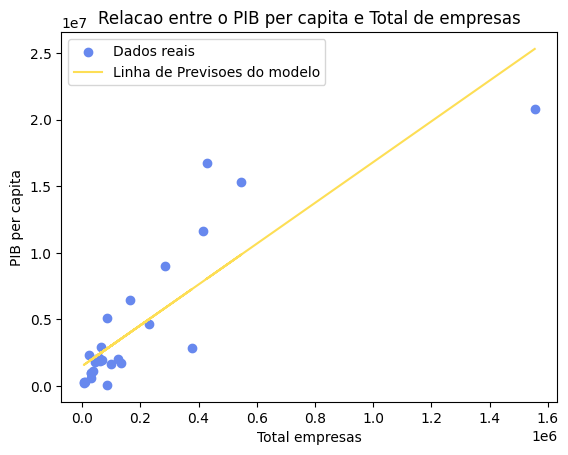

In [94]:
# Imprimindo a tabela de resultado
print(resultado_empresas.summary())

# Grafico de Dispersao 
plt.scatter(y=y2, x=df_pib_empresa_estado['COMP_TOT'], label='Dados reais')
plt.plot(df_pib_empresa_estado['COMP_TOT'], resultado_empresas.fittedvalues, color='#FDDE55', label='Linha de Previsoes do modelo')
plt.xlabel('Total empresas')
plt.ylabel('PIB per capita')
plt.title('Relacao entre o PIB per capita e Total de empresas')
plt.legend()
plt.show() 

* __Existe relação entre o PIB per capita e o total de carros e/ou motos?__

In [157]:
# Filtrando o dataset para analisar o PIB per capita como o IDH longevidade
df_pib_car_moto = df[['CITY','STATE','REGION', 'GDP_CAPITA', 'Cars', 'Motorcycles']]

# Criando uma coluna auxilixar com a suma de Carros e Motos
df_pib_car_moto['Total_Car_Moto'] = df_pib_car_moto['Cars'] + df_pib_car_moto['Motorcycles']

In [158]:
df_pib_car_moto

,CITY,STATE,REGION,GDP_CAPITA,Cars,Motorcycles,Total_Car_Moto
0,Abadia De Goiás,GO,Centro-Oeste,20665.0,2158,1246,3404
1,Abadiânia,GO,Centro-Oeste,15628.0,2838,1426,4264
2,Acreúna,GO,Centro-Oeste,28049.0,4892,3461,8353
3,Adelândia,GO,Centro-Oeste,12481.0,584,393,977
4,Alexânia,GO,Centro-Oeste,52952.0,6673,3027,9700
...,...,...,...,...,...,...,...
5573,Valença,RJ,Sudeste,27255.0,16411,4883,21294
5574,Varre-Sai,RJ,Sudeste,14923.0,1458,1153,2611
5575,Vassouras,RJ,Sudeste,27053.0,9641,3223,12864
5576,Volta Redonda,RJ,Sudeste,39679.0,98997,18837,117834


In [159]:
df_pib_car_moto.corr()

,GDP_CAPITA,Cars,Motorcycles,Total_Car_Moto
GDP_CAPITA,1.000000,0.089501,0.090614,0.090793
Cars,0.089501,1.000000,0.921386,0.997330
Motorcycles,0.090614,0.921386,1.000000,0.947306
Total_Car_Moto,0.090793,0.997330,0.947306,1.000000


In [156]:
df_pib_car_moto_estado = df_pib_car_moto.groupby(['STATE','REGION']).agg({'GDP_CAPITA':'median', 
                                                                          'Cars':'sum', 
                                                                          'Motorcycles':'sum', 
                                                                          'Total_Car_Moto':'sum'}
                                                                            ).sort_values(by='GDP_CAPITA', ascending=False).reset_index()

In [160]:
df_pib_car_moto_estado.corr()

,GDP_CAPITA,Cars,Motorcycles,Total_Car_Moto
GDP_CAPITA,1.000000,0.184344,0.016118,0.146521
Cars,0.184344,1.000000,0.943251,0.996920
Motorcycles,0.016118,0.943251,1.000000,0.966388
Total_Car_Moto,0.146521,0.996920,0.966388,1.000000


In [154]:
# Assimetria
skew_car = round(skew(df_pib_car_moto_estado['Cars']),2)
print('\33[3m\33[1mAssimetria do total de carros:\33[0m', skew_car)

skew_moto = round(skew(df_pib_car_moto_estado['Motorcycles']),2)
print('\33[3m\33[1mAssimetria do total de motos:\33[0m', skew_moto)

skew_car_moto = round(skew(df_pib_car_moto_estado['Total_Car_Moto']), 2)
print('\33[3m\33[1mAssimetria do total de carros e motos:\33[0m', skew_car_moto)

Assimetria do total de carros: 3.53
Assimetria do total de motos: 2.92
Assimetria do total de carros e motos: 3.48


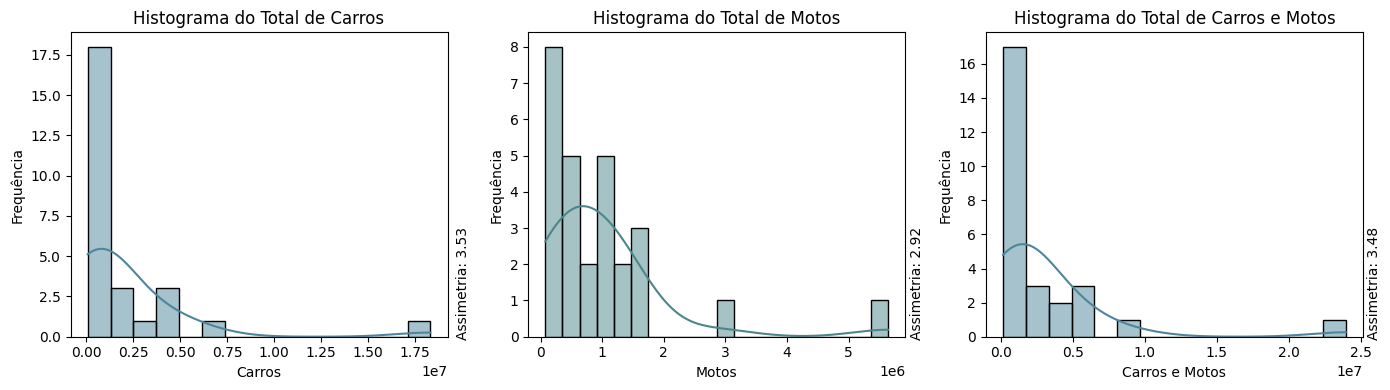

In [155]:
# Plotando o Histograma dos Dados de carros e Motos
fig, axes = plt.subplots(1,3, figsize=(14,4))

# Histograma do Total de Carros
sns.histplot(df_pib_car_moto_estado['Cars'], kde=True, color='#4D869C', bins=15, label='Carros',ax= axes[0])
axes[0].text(19700000, 0, f'Assimetria: {skew_car:.2f}',rotation=90)
axes[0].set_xlabel('Carros')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Histograma do Total de Carros')

# Histograma do Total de Motos
sns.histplot(df_pib_car_moto_estado['Motorcycles'], kde=True, color='#4D868A', bins=20, label='Motos', ax=axes[1])
axes[1].text(6000000, 0, f'Assimetria: {skew_moto:.2f}',rotation=90)
axes[1].set_xlabel('Motos')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Histograma do Total de Motos')

# Histograma do Total de Carros e Motos
sns.histplot(df_pib_car_moto_estado['Total_Car_Moto'], kde=True, color='#4D869C', bins=15, label='Carros e Motos', ax=axes[2])
axes[2].text(25400000, 0, f'Assimetria: {skew_car_moto:.2f}',rotation=90)
axes[2].set_xlabel('Carros e Motos')
axes[2].set_ylabel('Frequência')
axes[2].set_title('Histograma do Total de Carros e Motos')

plt.tight_layout()
plt.show()

* __Quantos veículos por pessoa em média cada Estado possui? E qual o Estado com maior e \
menor veículos por pessoa?__

In [105]:
# Filtrando o dataset para analisar o total de pessoas com o total de veiculos
df_veiculo = df[['STATE', 'IBGE_RES_POP', 'Cars', 'Motorcycles']]

# Criando uma coluna auxilixar com a suma de Carros e Motos
df_veiculo['Total_Car_Moto'] = df_veiculo['Cars'] + df_veiculo['Motorcycles']

In [161]:
df_veiculo.corr()

,IBGE_RES_POP,Cars,Motorcycles,Total_Car_Moto
IBGE_RES_POP,1.000000,0.965380,0.938477,0.972007
Cars,0.965380,1.000000,0.921386,0.997330
Motorcycles,0.938477,0.921386,1.000000,0.947306
Total_Car_Moto,0.972007,0.997330,0.947306,1.000000


In [106]:
# Agrupando o Total de pessos e veiculos por Estado
df_veiculo_estado = df_veiculo.groupby('STATE')['IBGE_RES_POP', 'Total_Car_Moto'].sum().sort_values(by='IBGE_RES_POP', ascending=False).reset_index()

In [107]:
# Coluna com o Total de Veiculo por Pessoa
df_veiculo_estado['Veiculo_Pessoa'] = df_veiculo_estado['Total_Car_Moto'] / df_veiculo_estado['IBGE_RES_POP']

# Coluna com o Total de Pessoa por Veiculo
df_veiculo_estado['Pessoa_Veiculo'] = df_veiculo_estado['IBGE_RES_POP'] / df_veiculo_estado['Total_Car_Moto']

# Organizar por Total de Veiculos
df_veiculo_estado = df_veiculo_estado.sort_values(by='Veiculo_Pessoa', ascending=False).reset_index(drop=True)

In [162]:
df_veiculo_estado

,STATE,IBGE_RES_POP,Total_Car_Moto,Veiculo_Pessoa,Pessoa_Veiculo
0,SC,6248436,4094167,0.655231,1.526180
1,DF,2570160,1499499,0.583426,1.714012
2,SP,41357343,23956157,0.579248,1.726376
3,PR,10452673,5910903,0.565492,1.768372
4,RS,10693929,5600673,0.523725,1.909401
5,MT,3035122,1583793,0.521822,1.916363
6,RO,1562409,803757,0.514434,1.943882
7,GO,6003788,3025623,0.503952,1.984315
8,MS,2449024,1221043,0.498584,2.005682
9,MG,19597330,9050944,0.461846,2.165225


In [108]:
# Media
media_veiculo = round(df_veiculo_estado['Veiculo_Pessoa'].mean(), 2)
print('\33[3m\33[1mMédia do Veiculo por Pessoa:\33[0m', media_veiculo)

# Mediana
mediana_veiculo = round(df_veiculo_estado['Veiculo_Pessoa'].median(), 2)
print('\33[3m\33[1mMediana do Veiculo por Pessoa:\33[0m', mediana_veiculo)

# Desvio Padrao
desvio_padrao_veiculo = round(df_veiculo_estado['Veiculo_Pessoa'].std(), 2)
print('\33[3m\33[1mDesvio Padrão do Veiculo por Pessoa:\33[0m', desvio_padrao_veiculo)

# Percentil
percentis_veiculo = np.percentile(df_veiculo_estado['Veiculo_Pessoa'], [25, 50, 75])
percentis_veiculo = np.round(percentis_veiculo, 2)
print('\33[3m\33[1m\nPercentis_veiculo do Veiculo por Pessoa:\33[0m')
print('\33[3mPrimeiro quartil (Q1):\33[0m', percentis_veiculo[0])
print('\33[3mMediana (Q2):\33[0m', percentis_veiculo[1])
print('\33[3mTerceiro quartil (Q3):\33[0m', percentis_veiculo[2])

# Assimetria
assimetria_veiculo = round(skew(df_veiculo_estado['Veiculo_Pessoa']), 2)
print('\n\33[3m\33[1mAssimetria do Veiculo por Pessoa:\33[0m', assimetria_veiculo)

# Interquartil, LCI e LCS 
maior_veiculo = round(df_veiculo_estado['Veiculo_Pessoa'].max(), 3)
menor_veiculo = round(df_veiculo_estado['Veiculo_Pessoa'].min(), 3)
print("\n\33[3m\33[1mMaior Veiculos por pessoas:\33[0m", maior_veiculo)
print("\33[3m\33[1mMenor Veiculos por pessoas:\33[0m", menor_veiculo)

Média do Veiculo por Pessoa: 0.39
Mediana do Veiculo por Pessoa: 0.36
Desvio Padrão do Veiculo por Pessoa: 0.13

Percentis_veiculo do Veiculo por Pessoa:
Primeiro quartil (Q1): 0.29
Mediana (Q2): 0.36
Terceiro quartil (Q3): 0.51

Assimetria do Veiculo por Pessoa: 0.28

Maior Veiculos por pessoas: 0.655
Menor Veiculos por pessoas: 0.205


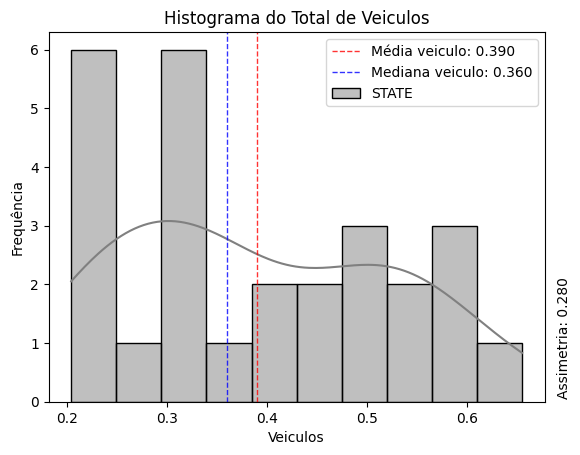

In [109]:
# Histograma do Veiculos por Pessoas
sns.histplot(df_veiculo_estado['Veiculo_Pessoa'], kde=True, color='gray', bins=10, label='STATE')

plt.axvline(media_veiculo, color='red', linestyle='--', linewidth=1, alpha=0.8, label=f'Média veiculo: {media_veiculo:.3f}')
plt.axvline(mediana_veiculo, color='blue', linestyle='--', linewidth=1, alpha=0.8, label=f'Mediana veiculo: {mediana_veiculo:.3f}')

plt.text(0.69, 0.1, f'Assimetria: {assimetria_veiculo:.3f}',rotation=90)

plt.xlabel('Veiculos')
plt.ylabel('Frequência')
plt.title('Histograma do Total de Veiculos')
plt.legend()
plt.show()

In [110]:
# Criando os objetos para responder a pergunta
# Estado com o maior Veiculo por pessoa
nome_maior_veiculo = df_veiculo_estado['STATE'].iloc[0]

# Estado com o menor Veiculo por pessoa
nome_menor_veiculo = df_veiculo_estado['STATE'].iloc[26]

Quantos veículos por pessoa em média cada Estado possui?
E qual o Estado com maior e menor veículos por pessoa?

Resposta:
Média Estadual de veículos por pessoa: 0.39.
O Estado com a maior média de veiculos por pessoa é SC, com 0.655 veiculos 
por pessoa. Enquanto isso, o Estado com a menor média de veiculos por
pessoa é AM, com apenas 0.205 veiculos por pessoa.


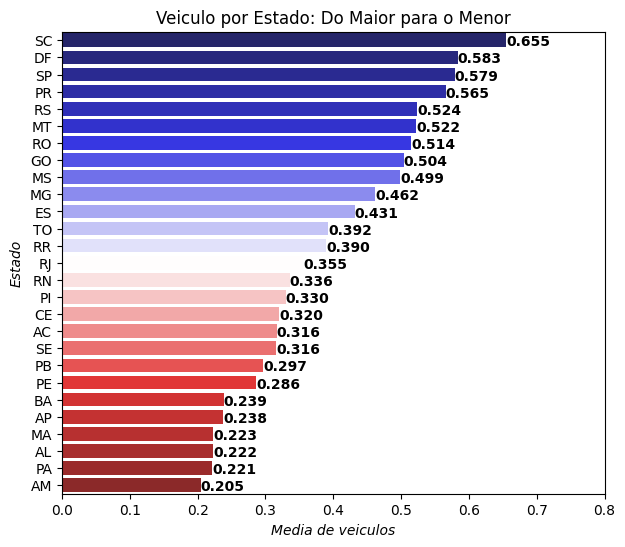

In [111]:
# Imprimindo a resposta
print('\033[1m\033[3mQuantos veículos por pessoa em média cada Estado possui?\n\
E qual o Estado com maior e menor veículos por pessoa?\033[0m\n')
print(f'\033[1m\033[3mResposta:\033[0m\n\
Média Estadual de veículos por pessoa: {media_veiculo}.\nO \
Estado com a maior média de veiculos por pessoa é \33[3m{nome_maior_veiculo}\33[0m, com \33[3m{maior_veiculo}\33[0m veiculos \n\
por pessoa. Enquanto isso, o Estado com a menor média de veiculos por\n\
pessoa é \33[3m{nome_menor_veiculo}\33[0m, com apenas \33[3m{menor_veiculo}\33[0m veiculos por pessoa.')

# Plotando o grafico com maiores veiculo
plt.figure(figsize=(7,6))

ax = sns.barplot(data=df_veiculo_estado,
                x='Veiculo_Pessoa',
                y='STATE', 
                orient='h',
                palette='seismic',
                alpha=0.9 )

# Adicionando rótulos de dados no centro de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width():.3f}', 
                (p.get_width() + p.get_x(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center_baseline', fontsize=10, color='black', fontweight='bold')

plt.xlim(0,0.8)
plt.title('Veiculo por Estado: Do Maior para o Menor')
plt.xlabel('Media de veiculos',fontstyle='italic')
plt.ylabel('Estado', fontstyle='italic')

plt.show()

* __Existe relação entre Áreas Plantadas e Número de Tratores? Justifique.__

In [165]:
# Filtrando o dataset para analisar o total de pessoas com o total de veiculos
df_trator = df[['STATE', 'REGION','IBGE_PLANTED_AREA', 'Wheeled_tractor']]

# agrupando os dados por Estado
df_trator_estado = df_trator.groupby(['STATE', 'REGION'])['IBGE_PLANTED_AREA', 'Wheeled_tractor'].sum().sort_values(by='Wheeled_tractor', ascending=False).reset_index()

In [166]:
X_sudesdete = df_trator_estado[df_trator_estado['REGION'] == 'Sudeste' ]
X_sul = df_trator_estado[df_trator_estado['REGION'] == 'Sul' ]
X_centro = df_trator_estado[df_trator_estado['REGION'] == 'Centro-Oeste' ]
X_norte = df_trator_estado[df_trator_estado['REGION'] == 'Norte' ]
X_nordeste = df_trator_estado[df_trator_estado['REGION'] == 'Nordeste' ]

In [167]:
df_trator.corr()

,IBGE_PLANTED_AREA,Wheeled_tractor
IBGE_PLANTED_AREA,1.000000,0.002595
Wheeled_tractor,0.002595,1.000000


In [168]:
# Imprimindo a correlacao da Area plantada pelo total de tratores
print('\33[1m\33[3mRegiao sul:\33[0m', X_sul.corr())
print('\33[1m\33[3m\nRegiao sudeste:\33[0m', X_sudesdete.corr())
print('\33[1m\33[3m\nRegiao centro:\33[0m', X_centro.corr())
print('\33[1m\33[3m\nRegiao norte:\33[0m', X_norte.corr())
print('\33[1m\33[3m\nRegiao nordeste:\33[0m', X_nordeste.corr())

Regiao sul:                    IBGE_PLANTED_AREA  Wheeled_tractor
IBGE_PLANTED_AREA           1.000000         0.181745
Wheeled_tractor             0.181745         1.000000

Regiao sudeste:                    IBGE_PLANTED_AREA  Wheeled_tractor
IBGE_PLANTED_AREA           1.000000         0.865044
Wheeled_tractor             0.865044         1.000000

Regiao centro:                    IBGE_PLANTED_AREA  Wheeled_tractor
IBGE_PLANTED_AREA           1.000000        -0.872629
Wheeled_tractor            -0.872629         1.000000

Regiao norte:                    IBGE_PLANTED_AREA  Wheeled_tractor
IBGE_PLANTED_AREA           1.000000         0.672809
Wheeled_tractor             0.672809         1.000000

Regiao nordeste:                    IBGE_PLANTED_AREA  Wheeled_tractor
IBGE_PLANTED_AREA           1.000000         0.364695
Wheeled_tractor             0.364695         1.000000


In [116]:
# Assimetria
skew_trator = round(skew(df_trator_estado['Wheeled_tractor']))

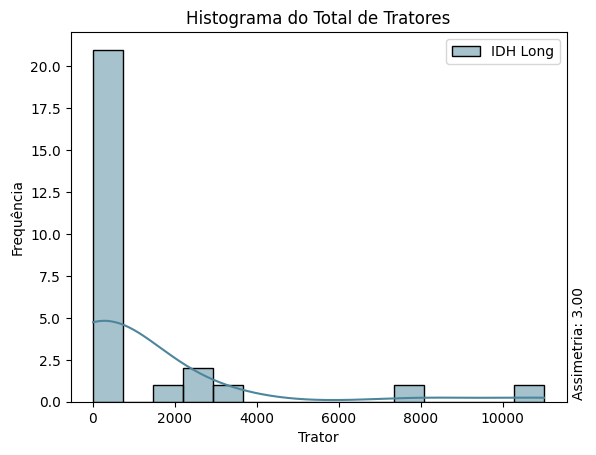

In [117]:
# Histograma do IDH Longevidade
sns.histplot(df_trator_estado['Wheeled_tractor'], kde=True, color='#4D869C', bins=15, label='IDH Long')
plt.text(11700, 0.3, f'Assimetria: {skew_trator:.2f}',rotation=90)
plt.xlabel('Trator')
plt.ylabel('Frequência')
plt.title('Histograma do Total de Tratores')
plt.legend()
plt.show()

In [118]:
# Preparacao dos dados para o modelo OLS 
X_trator = np.array(df_trator_estado['Wheeled_tractor'])

# Ajustando o Shape de X - Variavel Independente
X_trator = X_trator.reshape(-1,1)

# Preparacao da Variavel Alvo - Dependente
y_trator = df_trator_estado['AREA']

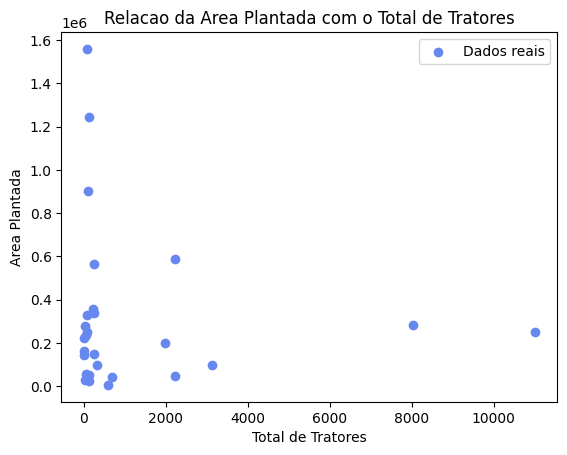

In [119]:
# Grafico de dispersao
plt.scatter(x=X_trator, 
            y=y_trator,
            label='Dados reais')
plt.xlabel('Total de Tratores')
plt.ylabel('Area Plantada')
plt.title('Relacao da Area Plantada com o Total de Tratores')
plt.legend()
plt.show()

In [120]:
# Adicao constante da variavel independente
X_trator = sm.add_constant(X_trator)

In [121]:
# Criando o modelo OLS - statsmodels
modelo_trator = sm.OLS(y_trator, X_trator)

In [122]:
# Treinando o modelo OLS
resultado_trator = modelo_trator.fit()

                            OLS Regression Results                            
Dep. Variable:                   AREA   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.1850
Date:                Sat, 01 Jun 2024   Prob (F-statistic):              0.671
Time:                        19:03:26   Log-Likelihood:                -384.24
No. Observations:                  27   AIC:                             772.5
Df Residuals:                      25   BIC:                             775.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.301e+05    8.1e+04      4.074      0.0

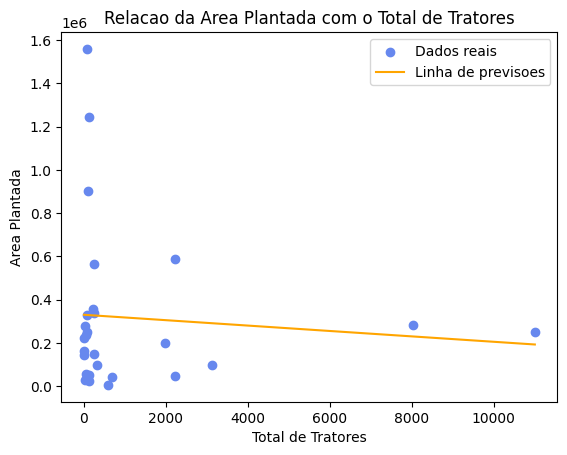

In [123]:
# Imprimindo a tabela de resultado
print(resultado_trator.summary())

# Grafico de Dispersao 
plt.scatter(y=y_trator,
           x=df_trator_estado['Wheeled_tractor'],
           label='Dados reais')
plt.plot(df_trator_estado['Wheeled_tractor'], resultado_trator.fittedvalues, color='orange', label='Linha de previsoes')
plt.xlabel('Total de Tratores')
plt.ylabel('Area Plantada')
plt.title('Relacao da Area Plantada com o Total de Tratores')
plt.legend()
plt.show()